# Analysis of results from Toloka survey

# Imports and installs

In [1]:
!pip3 install python-Levenshtein
!pip3 install seaborn
import pandas as pd
import numpy as np 
import datetime
import json
import copy
import Levenshtein
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# For JSON
from ast import literal_eval

# To be able to import from other notebook
!pip3 install nbimporter
import nbimporter
from extraction import extract_data

# Remove warning
pd.options.mode.chained_assignment = None

# For plotting
plt.rcParams['axes.facecolor']='white'  # to have white background
plt.rcParams['savefig.facecolor']='white'  # to have white background
hex1, hex2, hex3, hex4 = '#79ccb3', '#92cad1', '#e9724d', '#868686'
large_fontsize = 35
medium_fontsize = 25
small_fontsize = 20

raw = pd.read_json("data/kym.json")        # meme templates from Know Your Meme
events = pd.read_json("data/events.json")  # memes with timestamps from origin and spread
memes = extract_data(raw, events)

# Q1: Have you used this meme before?
# Q2: Have you seen others use this meme?
# Q3: Do you relate to this meme?

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

# Data selection and general visuals

### Select relevant columns and clean data

In [2]:
results = pd.read_csv("data/toloka_results.tsv", sep="\t")
results = results.drop(columns=['INPUT:image', 'OUTPUT:captcha', 'OUTPUT:text_review_mode', 'GOLDEN:q1', 'GOLDEN:q2', 'GOLDEN:q3', 'GOLDEN:result', 'GOLDEN:captcha', 'GOLDEN:reaction', 'GOLDEN:snowclone', 'GOLDEN:exploitable', 'GOLDEN:text_review_mode', 'HINT:text', 'HINT:default_language', 'ASSIGNMENT:link', 'ASSIGNMENT:task_id', 'ASSIGNMENT:assignment_id', 'ASSIGNMENT:worker_id', 'ASSIGNMENT:status'])
results['OUTPUT:result'] = results['OUTPUT:result'].apply(lambda x: json.loads(x))

# Convert multiple-choice answers to boolean
results['OUTPUT:q1'] = results['OUTPUT:q1'].map({'1y': True, '1n': False})
results['OUTPUT:q2'] = results['OUTPUT:q2'].map({'2y': True, '2n': False})
results['OUTPUT:q3'] = results['OUTPUT:q3'].map({'3y': True, '3n': False})

# Calculate time taken per assignment
results['ASSIGNMENT:submitted'] = pd.to_datetime(results['ASSIGNMENT:submitted'])
results['ASSIGNMENT:started'] = pd.to_datetime(results['ASSIGNMENT:started'])
results['minutes_taken'] = results['ASSIGNMENT:submitted'] - results['ASSIGNMENT:started']
results['minutes_taken'] = results['minutes_taken'].apply(lambda x: round(x.total_seconds() / 60, 2))
results = results.drop(columns=['ASSIGNMENT:started', 'ASSIGNMENT:submitted'])

results.head()

,INPUT:input,INPUT:memelink,OUTPUT:q1,OUTPUT:q2,OUTPUT:q3,OUTPUT:result,OUTPUT:reaction,OUTPUT:snowclone,OUTPUT:exploitable,minutes_taken
0,Autistic Screeching is an exploitable comic se...,https://knowyourmeme.com/memes/autistic-screec...,False,False,False,"{'Title': ['Autistic Screeching', '""autistic s...",False,True,False,8.59
1,"No Items, Fox Only, Final Destination is a cat...",https://knowyourmeme.com/memes/no-items-fox-on...,False,False,False,"{'Title': ['No Items, Fox Only, Final Destinat...",True,False,False,5.60
2,Lie Down / Try Not to Cry / Cry a Lot refers a...,https://knowyourmeme.com/memes/lie-down-try-no...,False,False,False,"{'Title': ['Lie Down', 'Try Not to Cry', 'Cry ...",True,False,False,2.71
3,Autistic Screeching is an exploitable comic se...,https://knowyourmeme.com/memes/autistic-screec...,False,False,False,"{'Title': ['Autistic Screeching'], 'Meaning': ...",True,False,False,6.74
4,Y'all Consider This A Date? refers to a series...,https://knowyourmeme.com/memes/yall-consider-t...,False,False,False,"{'Title': ['Y'all Consider This A Date?'], 'Me...",False,False,True,9.53


## Time taken for annotation

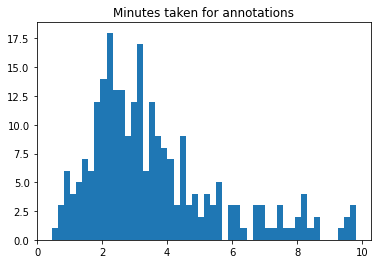

In [3]:
# Plot time taken for annotations (in minutes)
plt.hist(results['minutes_taken'], bins = 50)
# plt.bar(results['minutes_taken'], bins = len(results))
plt.title("Minutes taken for annotations")
plt.show()

## Analysis of multiple-choice answers

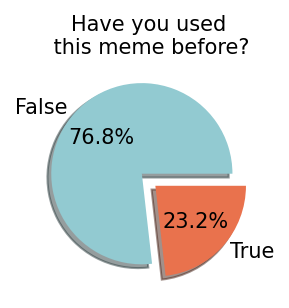

In [4]:
# Add year as separate column
from collections import Counter
plt.rcParams['figure.figsize'] = [2, 2]
plt.rcParams['figure.dpi'] = 150

plot_data = Counter(results['OUTPUT:q1'])

plt.figure(figsize=(2, 2), dpi=150)
plt.pie(x = plot_data.values(), labels = plot_data.keys(), colors=[hex2, hex3], autopct='%1.1f%%', shadow=True, explode=(0.1, 0.1))
# plt.ylabel('Total number', fontsize=medium_fontsize)
# plt.xlabel('Year', fontsize=medium_fontsize)
plt.title("Have you used\n this meme before?", fontsize=large_fontsize - 25)
# plt.xticks(ticks=[0,1], labels=["False", "True"], fontsize=small_fontsize)
# plt.yticks(fontsize=small_fontsize)
# plt.xlim([-1,len(plot_data.keys())])
# plt.set_size_inches(8, 6)
# plt.savefig('graphs/multiple_choice/q1.png', bbox_inches='tight')
plt.show()

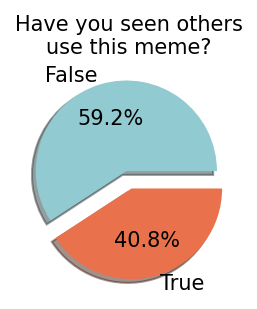

In [5]:
plot_data = Counter(results['OUTPUT:q2'])

plt.figure(figsize=(2, 2), dpi=150)
plt.pie(x = plot_data.values(), labels = plot_data.keys(), colors=[hex2, hex3], autopct='%1.1f%%', shadow=True, explode=(0.1, 0.1))
# plt.ylabel('Total number', fontsize=medium_fontsize)
# plt.xlabel('Year', fontsize=medium_fontsize)
plt.title("Have you seen others\nuse this meme?", fontsize=large_fontsize - 25)
# plt.xticks(ticks=[0,1], labels=["False", "True"], fontsize=small_fontsize)
# plt.yticks(fontsize=small_fontsize)
# plt.xlim([-1,len(plot_data.keys())])
# plt.savefig('graphs/multiple_choice/q2.png', bbox_inches='tight')
plt.show()

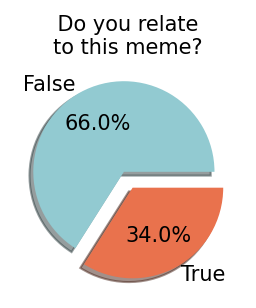

In [6]:
plot_data = Counter(results['OUTPUT:q3'])

plt.figure(figsize=(2, 2), dpi=150)
plt.pie(x = plot_data.values(), labels = plot_data.keys(), colors=[hex2, hex3], autopct='%1.1f%%', shadow=True, explode=(0.1, 0.1))
# plt.ylabel('Total number', fontsize=medium_fontsize)
# plt.xlabel('Year', fontsize=medium_fontsize)
plt.title("    Do you relate    \n     to this meme?     ", fontsize=large_fontsize - 25)
# plt.xticks(ticks=[0,1], labels=["False", "True"], fontsize=small_fontsize)
# plt.yticks(fontsize=small_fontsize)
# plt.xlim([-1,len(plot_data.keys())])
# plt.savefig('graphs/multiple_choice/q3.png', bbox_inches='tight')
plt.show()

In [7]:
# Agreement between questions
agreement = results['OUTPUT:q2'] == results['OUTPUT:q3']
agreement = [1 if a == b and a == True else 0 for a,b in zip(results['OUTPUT:q2'], results['OUTPUT:q3'])]
print(sum(agreement) / len(agreement))

0.216


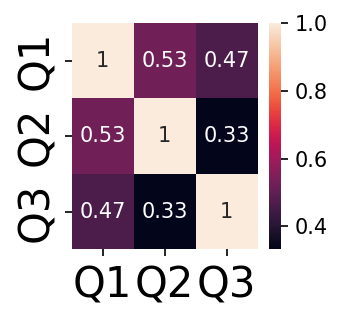

In [8]:
# Correlation between Q1, Q2 and Q3
questions = results[['OUTPUT:q1', 'OUTPUT:q2', 'OUTPUT:q3']]
questions['OUTPUT:q1'] = questions['OUTPUT:q1'].map({True: 1, False: 0})
questions['OUTPUT:q2'] = questions['OUTPUT:q2'].map({True: 1, False: 0})
questions['OUTPUT:q3'] = questions['OUTPUT:q3'].map({True: 1, False: 0})

questions.columns = ['Q1', 'Q2', 'Q3']
corr = questions.corr()
#print(corr)
sn.heatmap(corr, annot=True)
plt.xticks(fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.show()

In [9]:
# Check how often the annotated type matches the type(s) that we have in the dataset (ground truth)
types = results[['INPUT:memelink', 'OUTPUT:reaction', 'OUTPUT:snowclone', 'OUTPUT:exploitable', 'OUTPUT:result']]
types.rename(columns = {'INPUT:memelink':'url'}, inplace = True)
types = pd.merge(types, memes, on="url", how="left")
types = types[['url', 'type', 'OUTPUT:reaction', 'OUTPUT:snowclone', 'OUTPUT:exploitable', 'OUTPUT:result']]

typematch = []
for target, r, s, e in zip(types['type'], types['OUTPUT:reaction'], types['OUTPUT:snowclone'], types['OUTPUT:exploitable']):
    output = set()
    if r == True:
        output.add("reaction")
    if s == True:
        output.add("snowclone")
    if e == True:
        output.add("exploitable")
    if len(output.intersection(set(target))) > 0:
        typematch.append(1)
    else:
        typematch.append(0)
    
print("Percentage of annotations that got the type right:", sum(typematch) / len(typematch))

Percentage of annotations that got the type right: 0.6


In [10]:
# TODO check agreement between annotators for a meme's type (there are 5 annotations, what percentage of them match? – not sure how to measure)

# Highlights

## General visualizations

## Evaluate agreement of Toloka highlights: MEANING

### NUMBER of annotations

In [11]:
annotations = {key:[] for key in set(results['INPUT:memelink'])}
for url, highlights in zip(results['INPUT:memelink'], results['OUTPUT:result']):
    annotations[url].append(highlights)

# Number of annotations for Meaning
num_annotations = {key:[] for key in set(results['INPUT:memelink'])}
for key, val in annotations.items():
    num_annotations[key] = [len(x['Meaning']) if 'Meaning' in x.keys() else 0 for x in val]

# Rank the annotation similarity by standard deviation of NUMBER of annotations
std_annotations = {key:0 for key in set(results['INPUT:memelink'])}
for key, val in num_annotations.items():
    std_annotations[key] = np.std(val)
std_annotations = dict(sorted(std_annotations.items(), key=lambda item: item[1]))
print("Standard deviation of NUMBER of annotations (meaning):\n", std_annotations.values())

Standard deviation of NUMBER of annotations (meaning):
 dict_values([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4000000000000001, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.4898979485566356, 0.6324555320336759, 0.6324555320336759, 0.6324555320336759, 0.6324555320336759, 0.7483314773547883, 0.8000000000000002, 0.8000000000000002, 0.8944271909999159, 1.3564659966250538, 4.8])


In [12]:
# Check facts for nr of annotations
print("Median nr of annotations (Meaning) per meme:", Counter([round(np.median(nrs)) for nrs in num_annotations.values()]))
all_num_annotations = [x for val in num_annotations.values() for x in val]
print("Meaning:", Counter(all_num_annotations))

Median nr of annotations (Meaning) per meme: Counter({1: 48, 2: 2})
Meaning: Counter({1: 194, 2: 36, 0: 15, 3: 3, 4: 1, 13: 1})


### LENGTH of annotations

In [13]:
annotation_lengths = {key:0 for key in set(results['INPUT:memelink'])}
annotation_words = {key:0 for key in set(results['INPUT:memelink'])}
annotation_length_std = {key:0 for key in set(results['INPUT:memelink'])}
for key, val in annotations.items():
    avg_lengths = []
    avg_word_lengths = []
    for ann in val:
        avg = []
        word_avg = []
        if 'Meaning' in ann.keys():
            for highlight in ann['Meaning']:
                avg.append(len(highlight))
                word_avg.append(len(highlight.split(" ")))
            avg_lengths.append(round(sum(avg) / len(avg)))
            avg_word_lengths.append(round(sum(word_avg) / len(word_avg)))
        else:
            avg_lengths.append(0)
            avg_word_lengths.append(0)
    annotation_lengths[key] = avg_lengths
    annotation_words[key] = avg_word_lengths
    annotation_length_std[key] = np.std(avg_lengths)
    
annotation_length_std = dict(sorted(annotation_length_std.items(), key=lambda item: item[1]))
print("Standard deviation of AVERAGE LENGTH of annotations (meaning):\n", annotation_length_std.values())

Standard deviation of AVERAGE LENGTH of annotations (meaning):
 dict_values([4.758150901348127, 5.1536394906900505, 5.782732917920384, 12.286578042726134, 17.26962651593832, 18.24938355123263, 18.30409790183608, 19.019989484749985, 21.30352083576797, 21.509067855209345, 21.73844520659194, 22.130521909796887, 24.079867109267855, 24.87247474619283, 26.346916328101855, 26.430285658690863, 26.92656680678025, 28.5769137591868, 30.99032106965012, 34.197075898386394, 37.002702603999076, 38.582897765719984, 40.10984916451319, 40.88814008976197, 45.89291884376063, 47.973325921807835, 49.77790674586467, 50.860593783399736, 52.083010665667175, 53.32316569747149, 53.809292877717695, 57.043842787806646, 59.796320957062235, 61.75953367699598, 63.754529250869695, 69.14506489981768, 70.18432873512434, 72.517584074485, 78.20639360052348, 78.43111627409112, 78.63332626819242, 78.83806187369144, 88.01045392451967, 95.64643223874062, 99.17782010106897, 100.86942053962638, 102.92987904393942, 119.110704808

In [14]:
annotations[list(annotation_length_std.keys())[2]]

[{'Title': ['Pennywise The Clown'],
  'Meaning': ['people use the image as a reaction or to portray the things that would entice them in the face of certain death.']},
 {'Title': ['Pennywise The Clown'],
  'Meaning': ['use the image as a reaction or to portray the things that would entice them in the face of certain death.']},
 {'Title': ['Pennywise The Clown'],
  'Meaning': ['Online, people use the image as a reaction or to portray the things that would entice them in the face of certain death.']},
 {'Title': ['Pennywise The Clown'],
  'Meaning': ['people use the image as a reaction or to portray the things that would entice them in the face of certain death.']},
 {'Title': ['Pennywise The Clown'],
  'Meaning': ['use the image as a reaction or to portray the things that would entice them in the face of certain death']}]

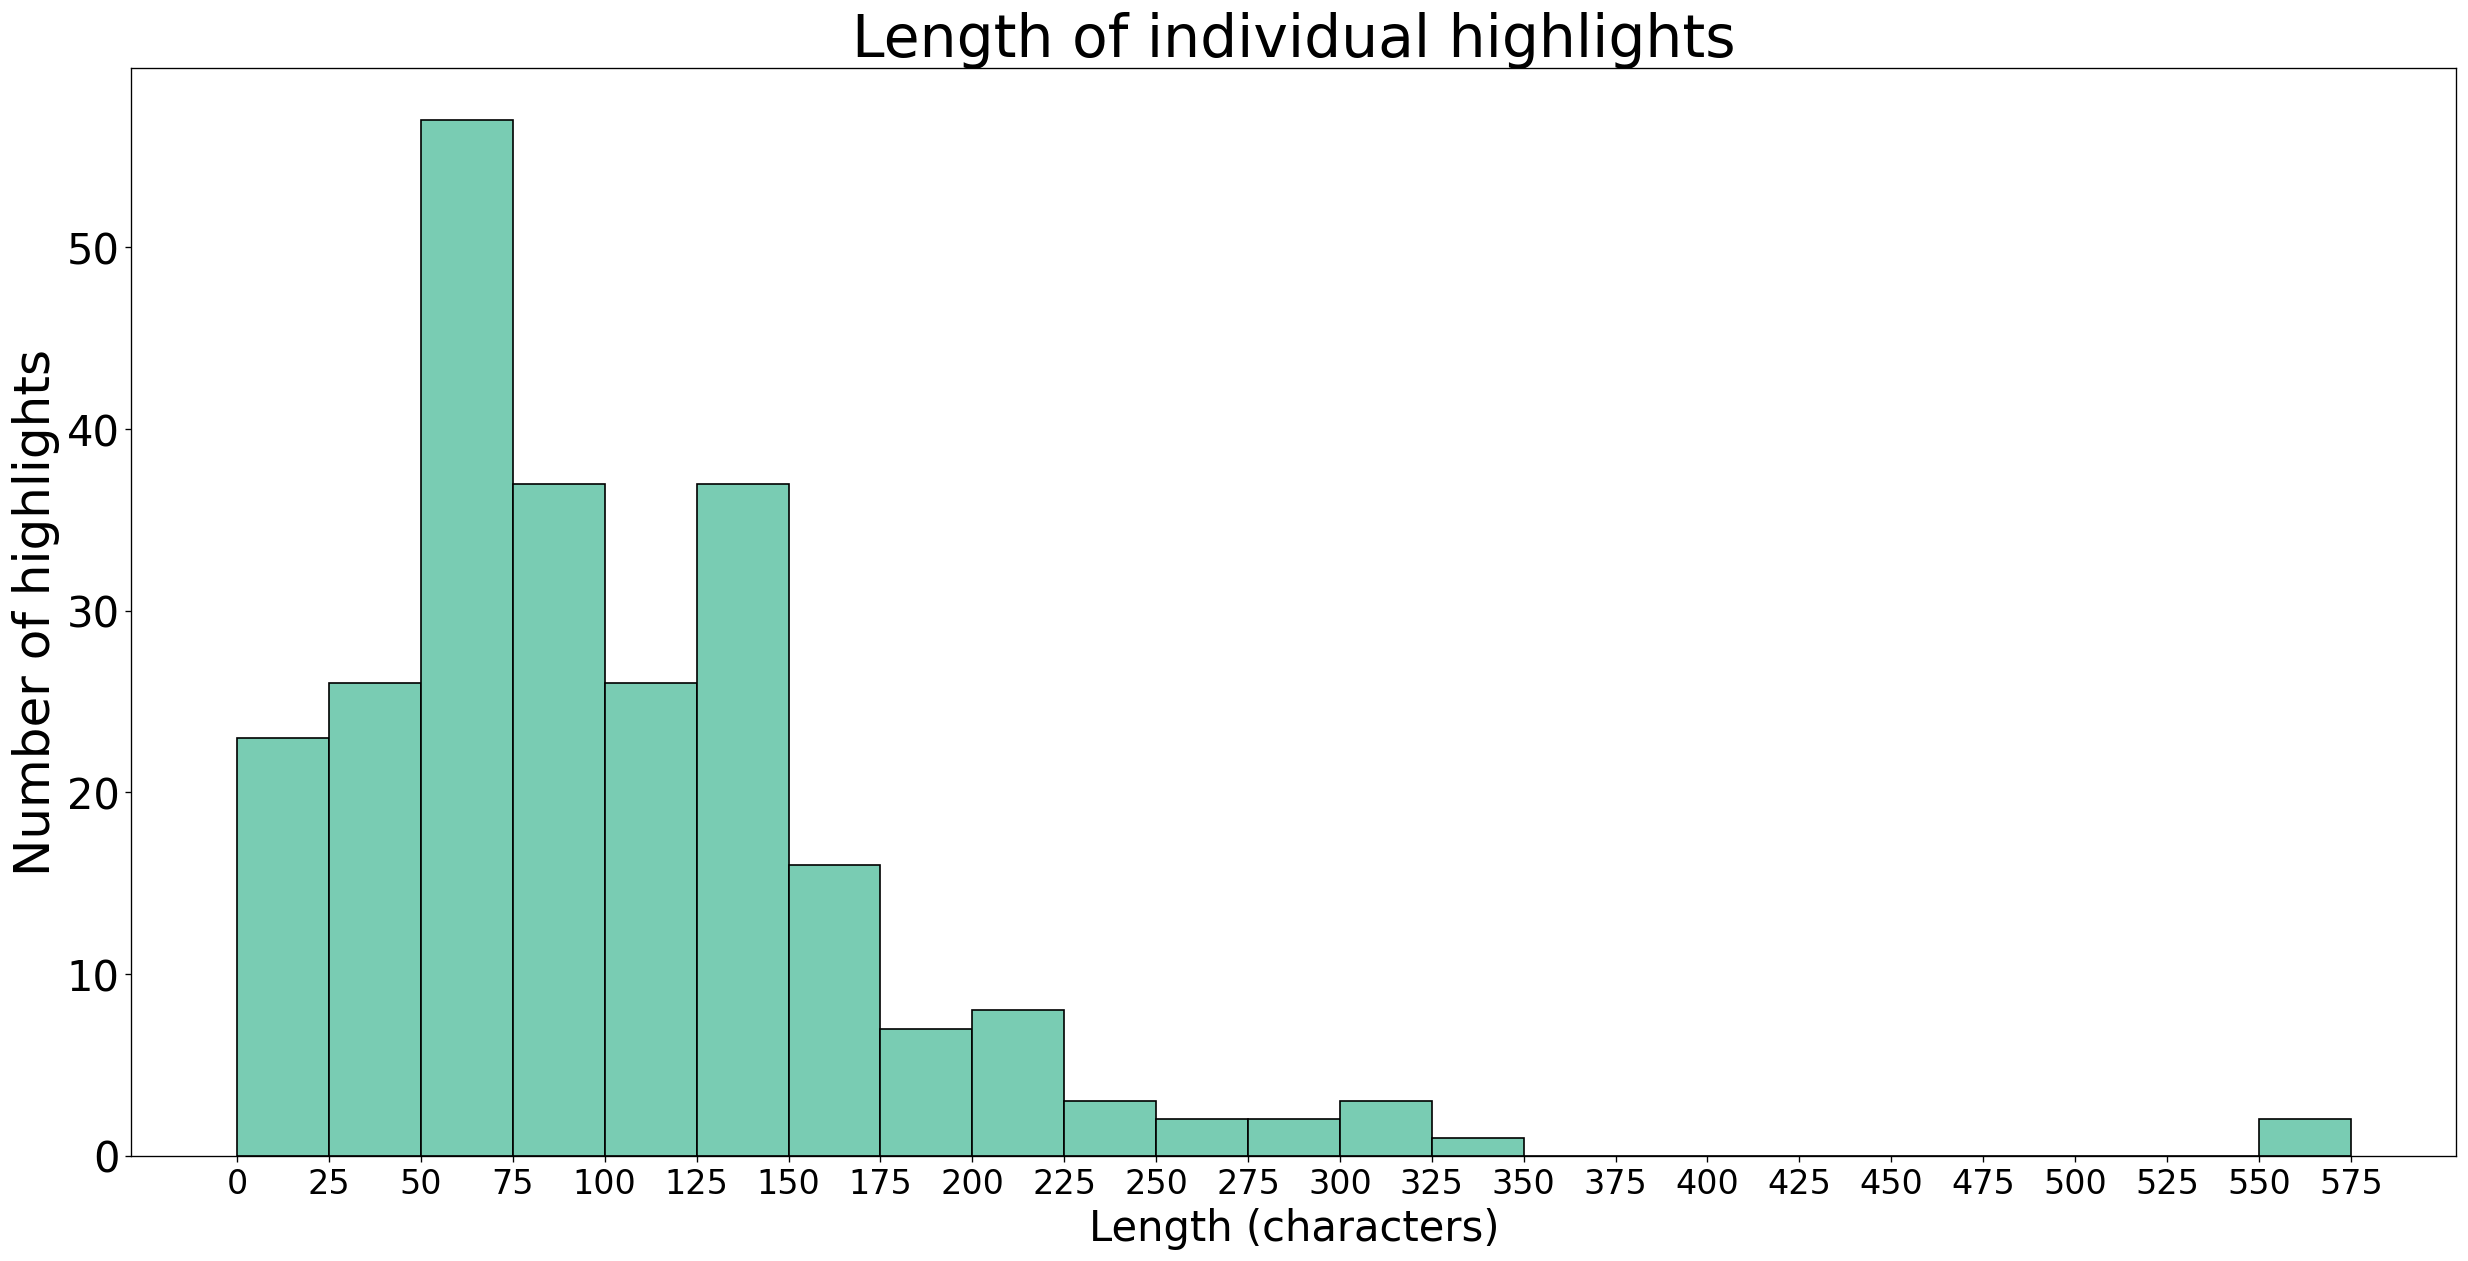

In [15]:
# Length of individual highlights (characters)
flat_annotation_lengths = [x for val in annotation_lengths.values() for x in val]
plt.figure(figsize=(25, 12), dpi=120)
plt.hist(flat_annotation_lengths, bins=np.arange(0, 600, 25), color=hex1, edgecolor='black')
plt.title("Length of individual highlights", fontsize=large_fontsize)
plt.ylabel('Number of highlights', fontsize=medium_fontsize+5)
plt.xlabel('Length (characters)', fontsize=medium_fontsize)
plt.xticks(np.arange(0, 600, 25), fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize+5)
# plt.savefig('graphs/toloka/meaning/nr_annotations_hist.png', bbox_inches='tight')
plt.show()

In [16]:
# Average length of highlights altogether
# print(np.mean([x for x in flat_annotation_lengths if x > 0]))
# flat_annotation_lengths = [x for val in annotation_words.values() for x in val]
# print(np.mean([x for x in flat_annotation_lengths if x > 0]))

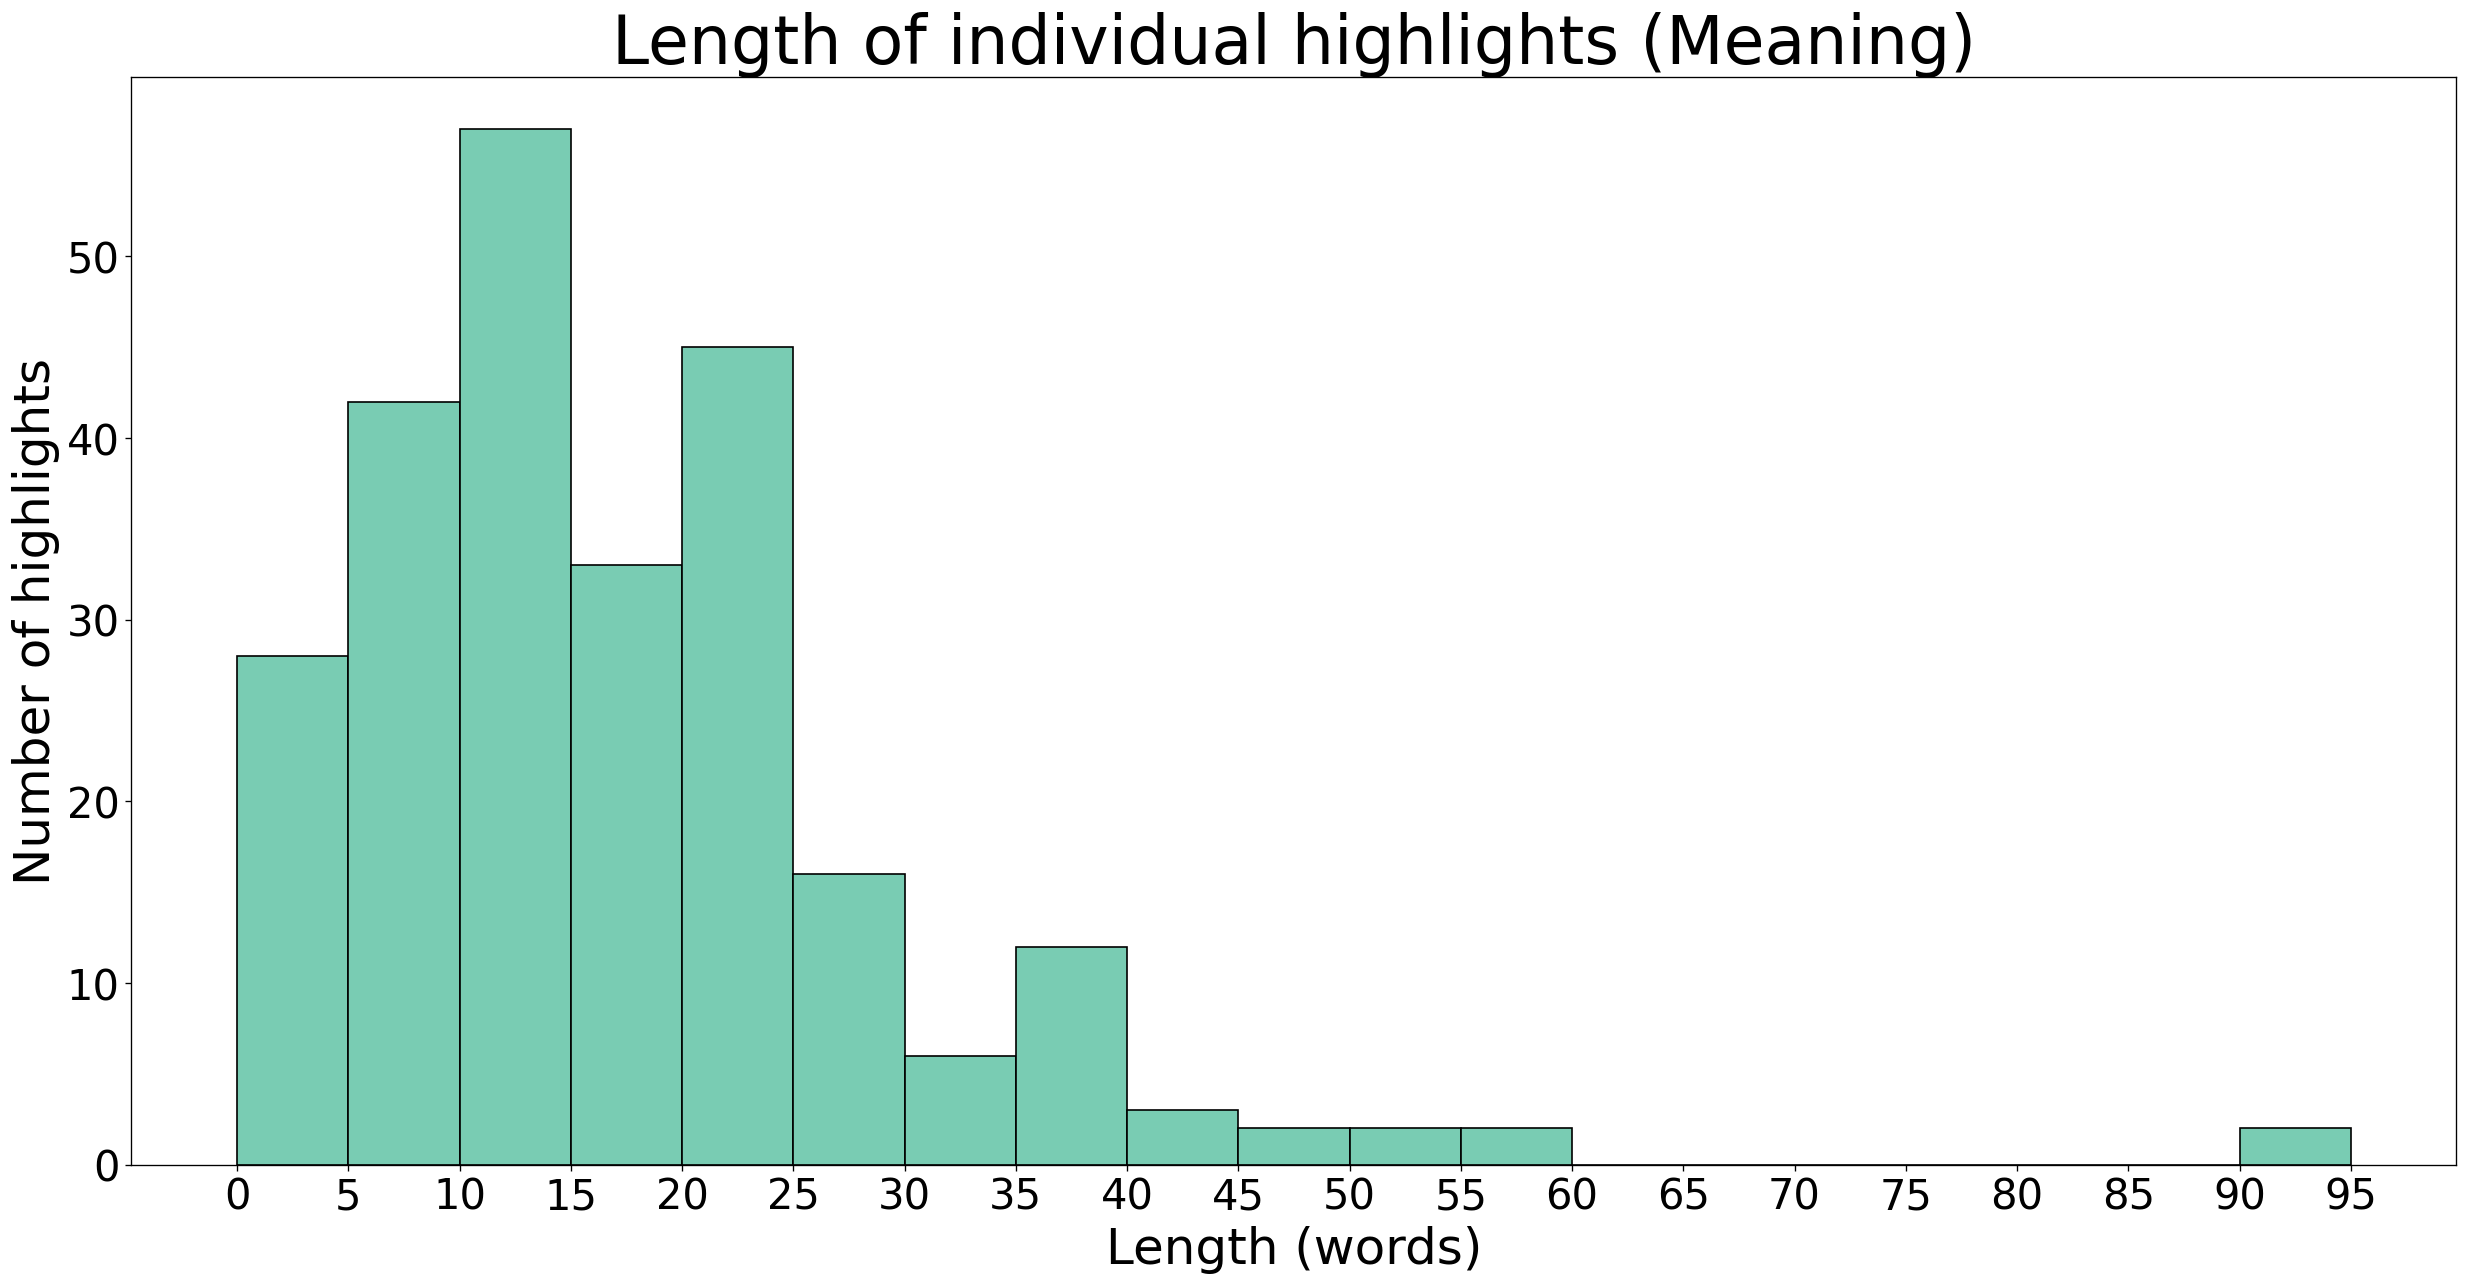

In [17]:
# Length of individual highlights (words)
flat_annotation_words = [x for val in annotation_words.values() for x in val]

# Get percentage of highlights that are shorter than X words
top = list(map(lambda x: x < 25, flat_annotation_words))
# print(sum(top) / len(top))

flat_annotation_words
plt.figure(figsize=(25, 12), dpi=120)
plt.hist(flat_annotation_words, bins=np.arange(0, 100, 5), color=hex1, edgecolor='black')
plt.title("Length of individual highlights (Meaning)", fontsize=large_fontsize+5)
plt.ylabel('Number of highlights', fontsize=medium_fontsize+5)
plt.xlabel('Length (words)', fontsize=medium_fontsize+5)
plt.xticks(np.arange(0, 100, 5), fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
# plt.savefig('graphs/toloka/meaning/length_annotations_hist.png', bbox_inches='tight')
plt.show()

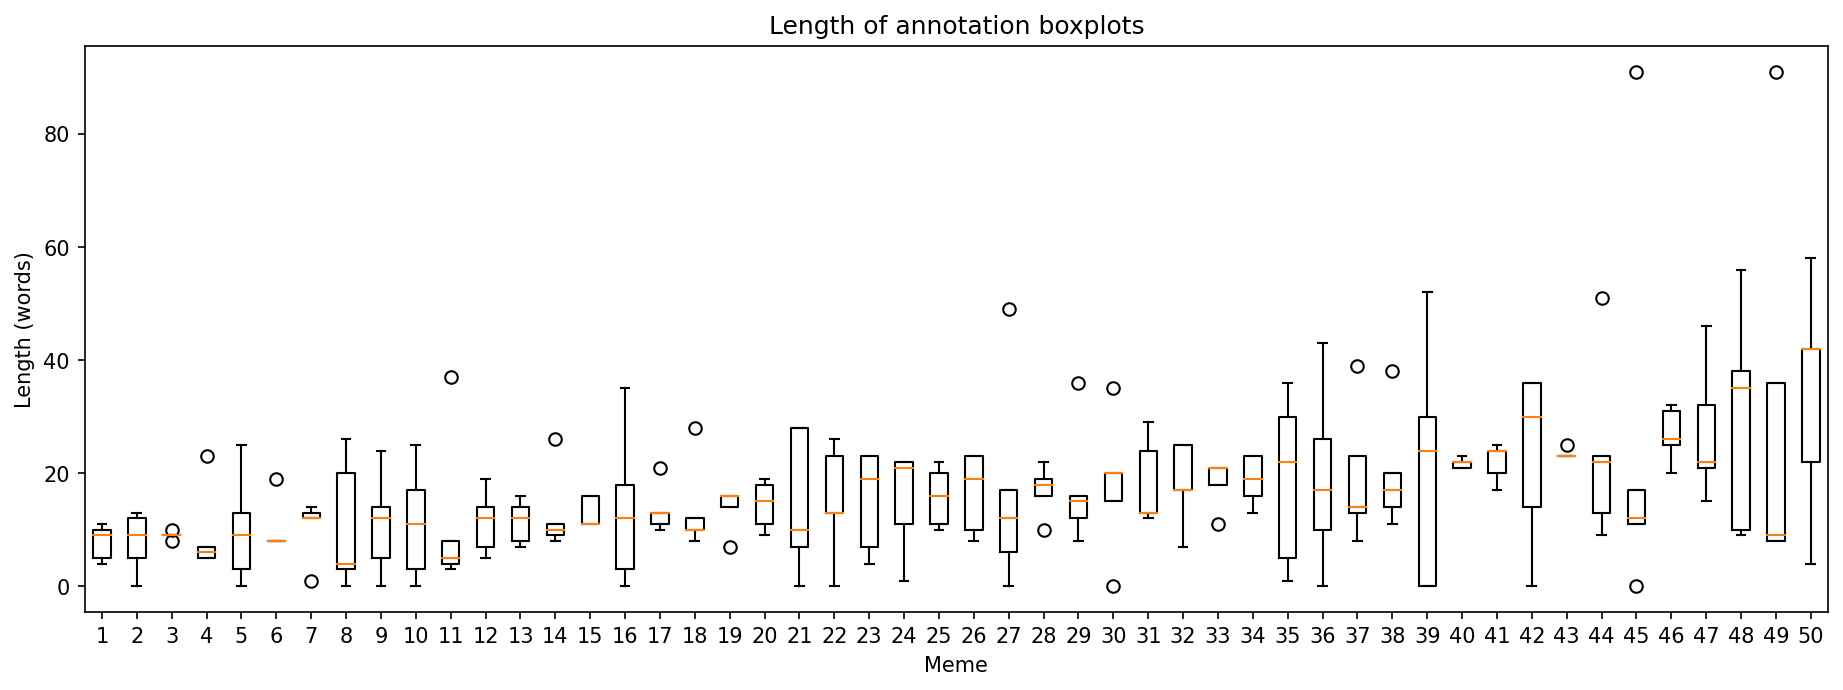

In [18]:
# Boxplot for length of highlights (all memes)
plt.figure(figsize=(15,5))

averages = ((sum(lengths) / len(lengths), meme) for meme, lengths in annotation_words.items())
averages = sorted(averages)
key_order = [t[1] for t in averages]

data = [annotation_words[key] for key in key_order]

positions = np.arange(1, 51, step=1)
plt.boxplot(data, positions=positions, showfliers=True)
plt.title('Length of annotation boxplots')
plt.ylabel('Length (words)')
plt.xlabel('Meme')
plt.xticks(np.arange(1, 51, step=1))

# plt.savefig('graphs/toloka/meaning/length_boxplots.png')
plt.show()

### DISTANCE of annotations (Levenshtein)

#### Make dictionary of all highlights

In [19]:
highlights = {key:[] for key in set(results['INPUT:memelink'])}

for key, val in annotations.items():
    ID = 0
    anns = []
    for ann in val:
        ID += 1
        if 'Meaning' in ann.keys():
            for a in ann['Meaning']:
                anns.append((ID, a))
        else:
            anns.append((ID, "")) # Missing annotations
    highlights[key] = anns

#### Make dictionary of all distances

In [20]:
distances = {key:{} for key in set(results['INPUT:memelink'])}

# Calculate distances
for key, val in highlights.items():
    lev = {}
    for i in range(len(val) - 1):
        for j in range(i + 1, len(val)):
            ann1 = val[i]
            ann2 = val[j]
            if ann1[0] != ann2[0]:
                new_key = "A" + str(ann1[0]) + "-A" + str(ann2[0])
                if new_key in lev.keys():
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key].append(-1)
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key].append(dist / max(len(ann1[1]), len(ann2[1])))  # normalize to [0,1], see https://stackoverflow.com/questions/45783385/normalizing-the-edit-distance
                else:
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key] = [-1]
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key] = [dist / max(len(ann1[1]), len(ann2[1]))]
    distances[key] = lev
    
# Create flat list with all distances
hist_data = [min(x) for val in distances.values() for x in val.values()]
hist_data = [x for x in hist_data if x != -1]

#### Function that creates a similarity matrix for each meme (all in one array)

In [21]:
def similarity_matrices(similarity_threshold):
    matrices = {}       
    col_names = ['A1', 'A2', 'A3', 'A4', 'A5']
    for key, value in distances.items():
        columns = {key:[] for key in col_names}
        c = 0
        
        # Take minimum distance if there are multiple
        for k, v in value.items():
            l = [x for x in v if x != -1]
            dist =  min(l) if len(l) > 0 else np.nan
            columns[k[:2]].append(dist)

        # Add np.nan to make matrix complete
        for k in columns.keys():
            for i in range(5 - len(columns[k])):
                columns[k].insert(0, np.nan)

        df = pd.DataFrame(columns, index = col_names)    

        # Mirror bottom values to top
        for i in range(1,6):
            label = 'A' + str(i)
            col = df[label]
            row = df.loc[label]
            new_row = []
            for c, r in zip(col, row):
                if c != np.nan:
                    new_row.append(c)
                else:
                    new_row.append(r)
            df.loc[label] = new_row

        # Change diagonal values to 0
        np.fill_diagonal(df.values, 0)

        # Apply similarity threshold
        df = df.applymap(lambda x: 1 if x <= similarity_threshold else 0)

        # Add new row with sum
        df.loc["Total"] = df.sum()

        matrices[key] = df
    return matrices

#### Function that outputs proportion of pairwise annotation matches

In [22]:
def consensus_level(matrix):
    m_sum = 0
    for i, col in enumerate(matrix.columns):
        row = list(matrix.loc[col])
        m_sum += sum(row[i+1:])
    return m_sum / 10

#### Define similarity threshold and consensus percentage

In [23]:
similarity_threshold = 0.2  # If the distance between two annotations is less OR EQUAL than this, they are considered a match
consensus_percentage = 0.6  # If at least X% of the pairwise comparisons are a match, we consider it to have consensus

matrices = similarity_matrices(similarity_threshold)
matrices[list(matrices.keys())[1]]
list(matrices.keys())[1]

'https://knowyourmeme.com/memes/repost-if-x'

#### Plot number of memes that match consensus

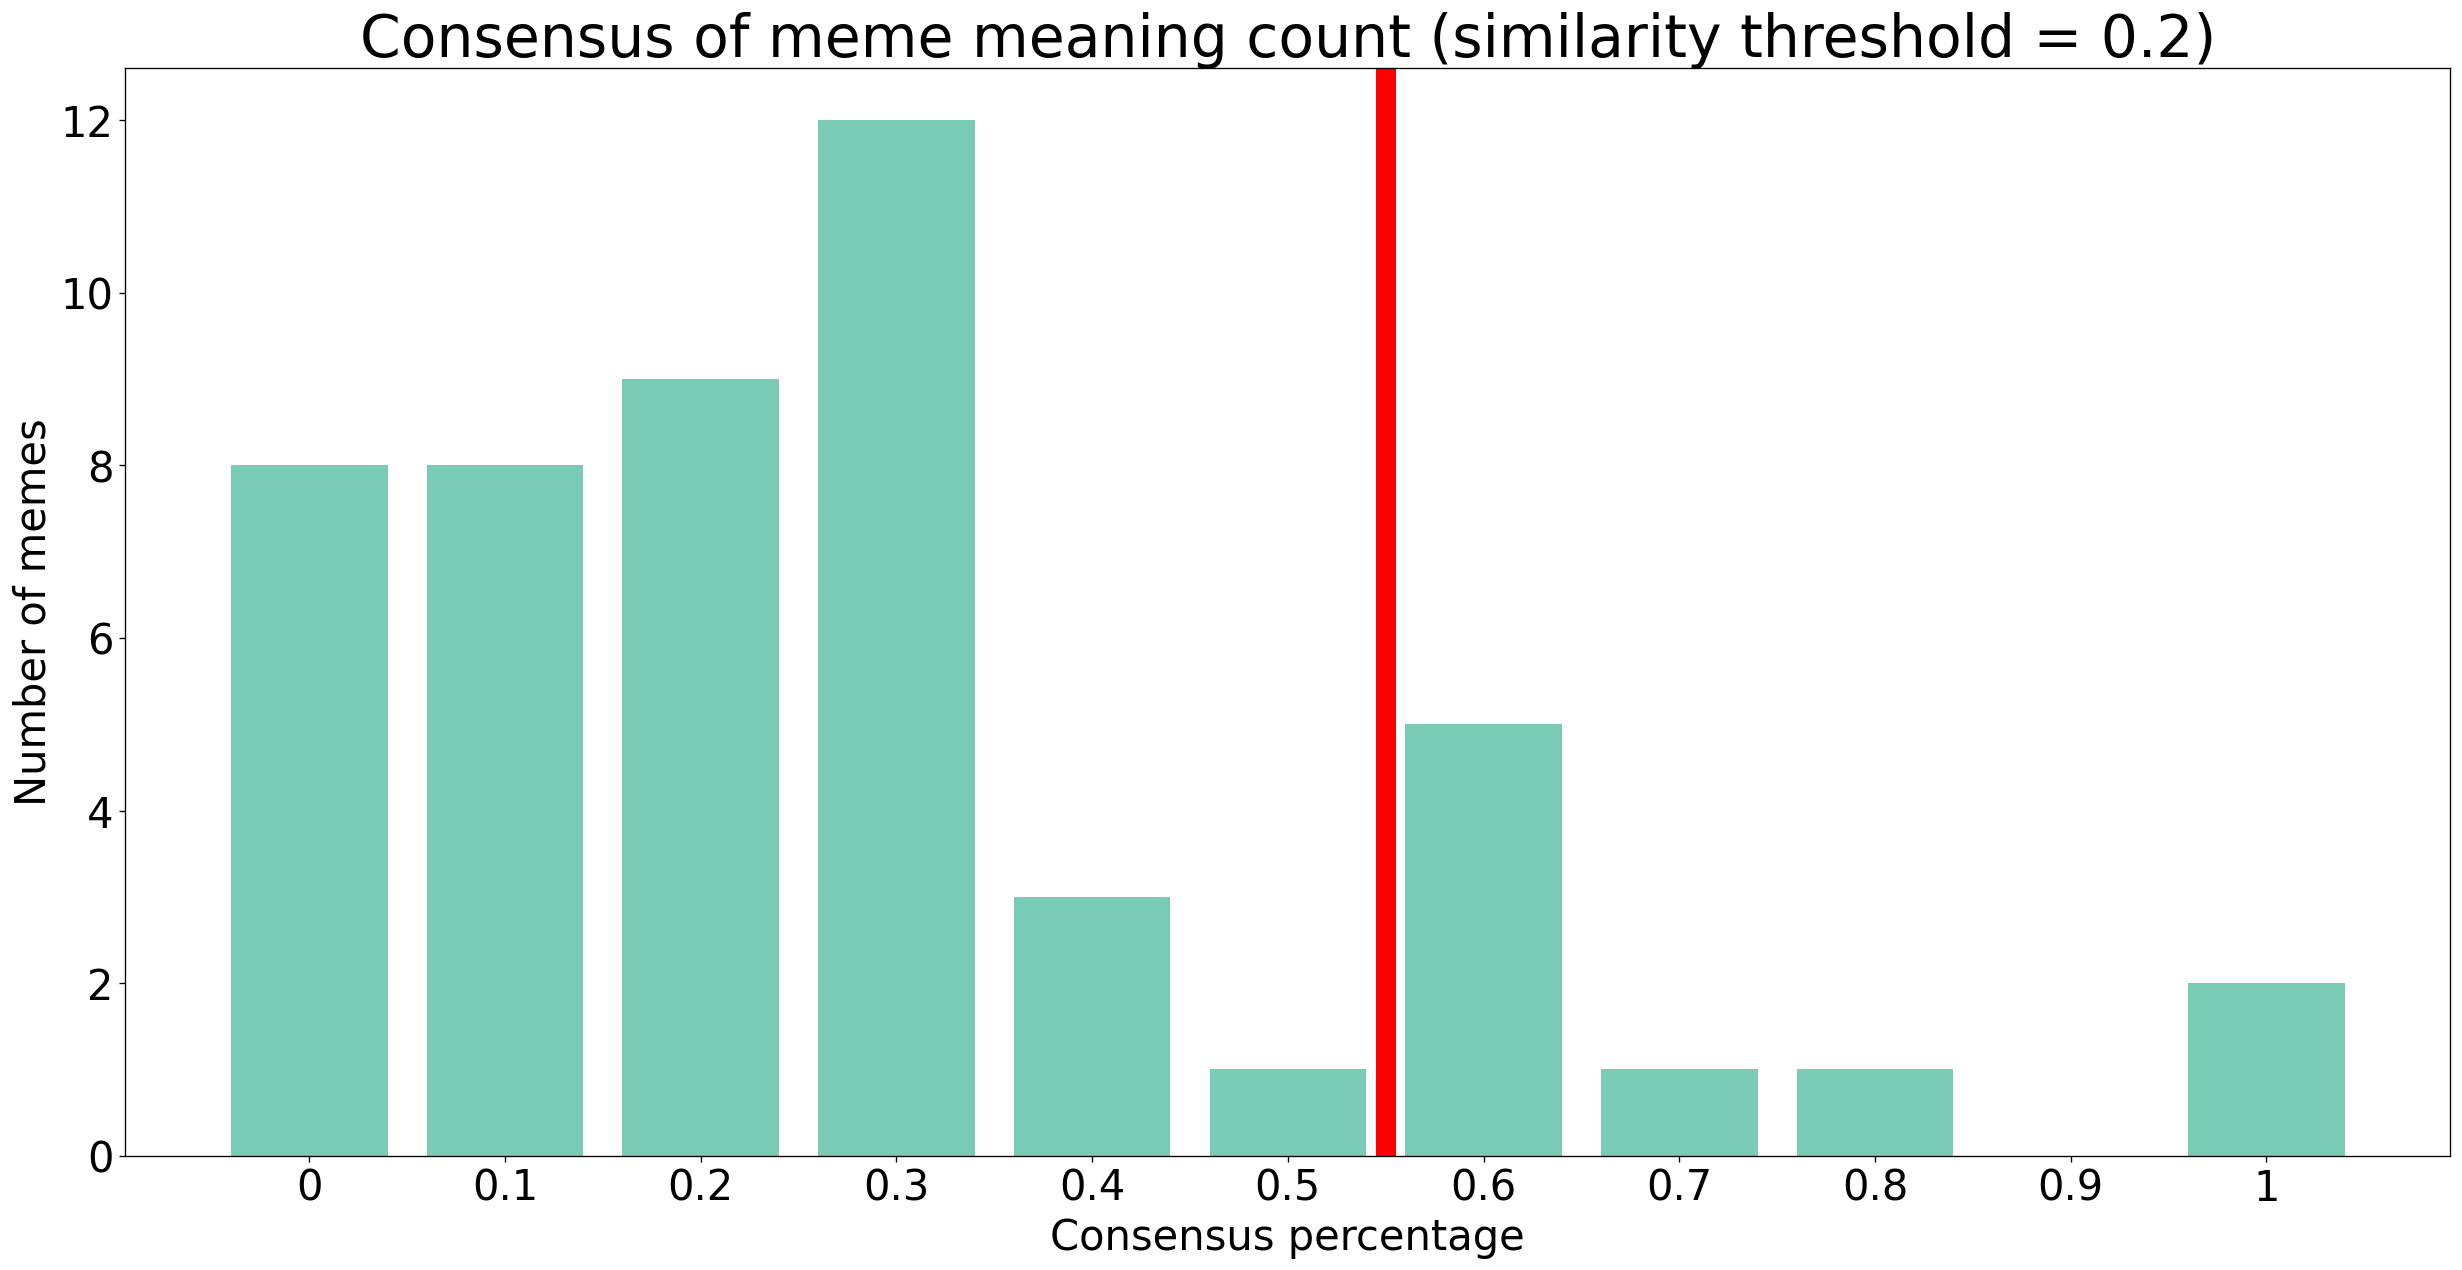

In [24]:
# Calculate consensus for each meme
consensus_data = {}
for key, m in matrices.items():
    proportion = consensus_level(m)
    consensus_data[key] = proportion
    
# Create Counter
consensus_counter = Counter(consensus_data.values())    
    
# Fill in missing values with 0
for i in np.arange(0, 1.1, 0.1):
    i = round(i,1)
    if i not in consensus_counter.keys():
        consensus_counter[i] = 0

# Sort the data
consensus_counter = dict(sorted(consensus_counter.items(), key=lambda item: item[0], reverse=False))

# Visualize
plt.figure(figsize=(25, 12), dpi=120)
plt.bar(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], consensus_counter.values(), color=hex1)
plt.axvline(x=consensus_percentage*10*0.917, color="red", linewidth=12)
plt.ylabel('Number of memes', fontsize=medium_fontsize)
plt.xlabel('Consensus percentage', fontsize=medium_fontsize)
plt.xticks(fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
plt.title("Consensus of meme meaning count (similarity threshold = {})".format(similarity_threshold), fontsize=large_fontsize)
# plt.savefig('graphs/toloka/meaning/consensus.png', bbox_inches='tight')
plt.show() 

#### Plot number of accepted memes for different similarity thresholds

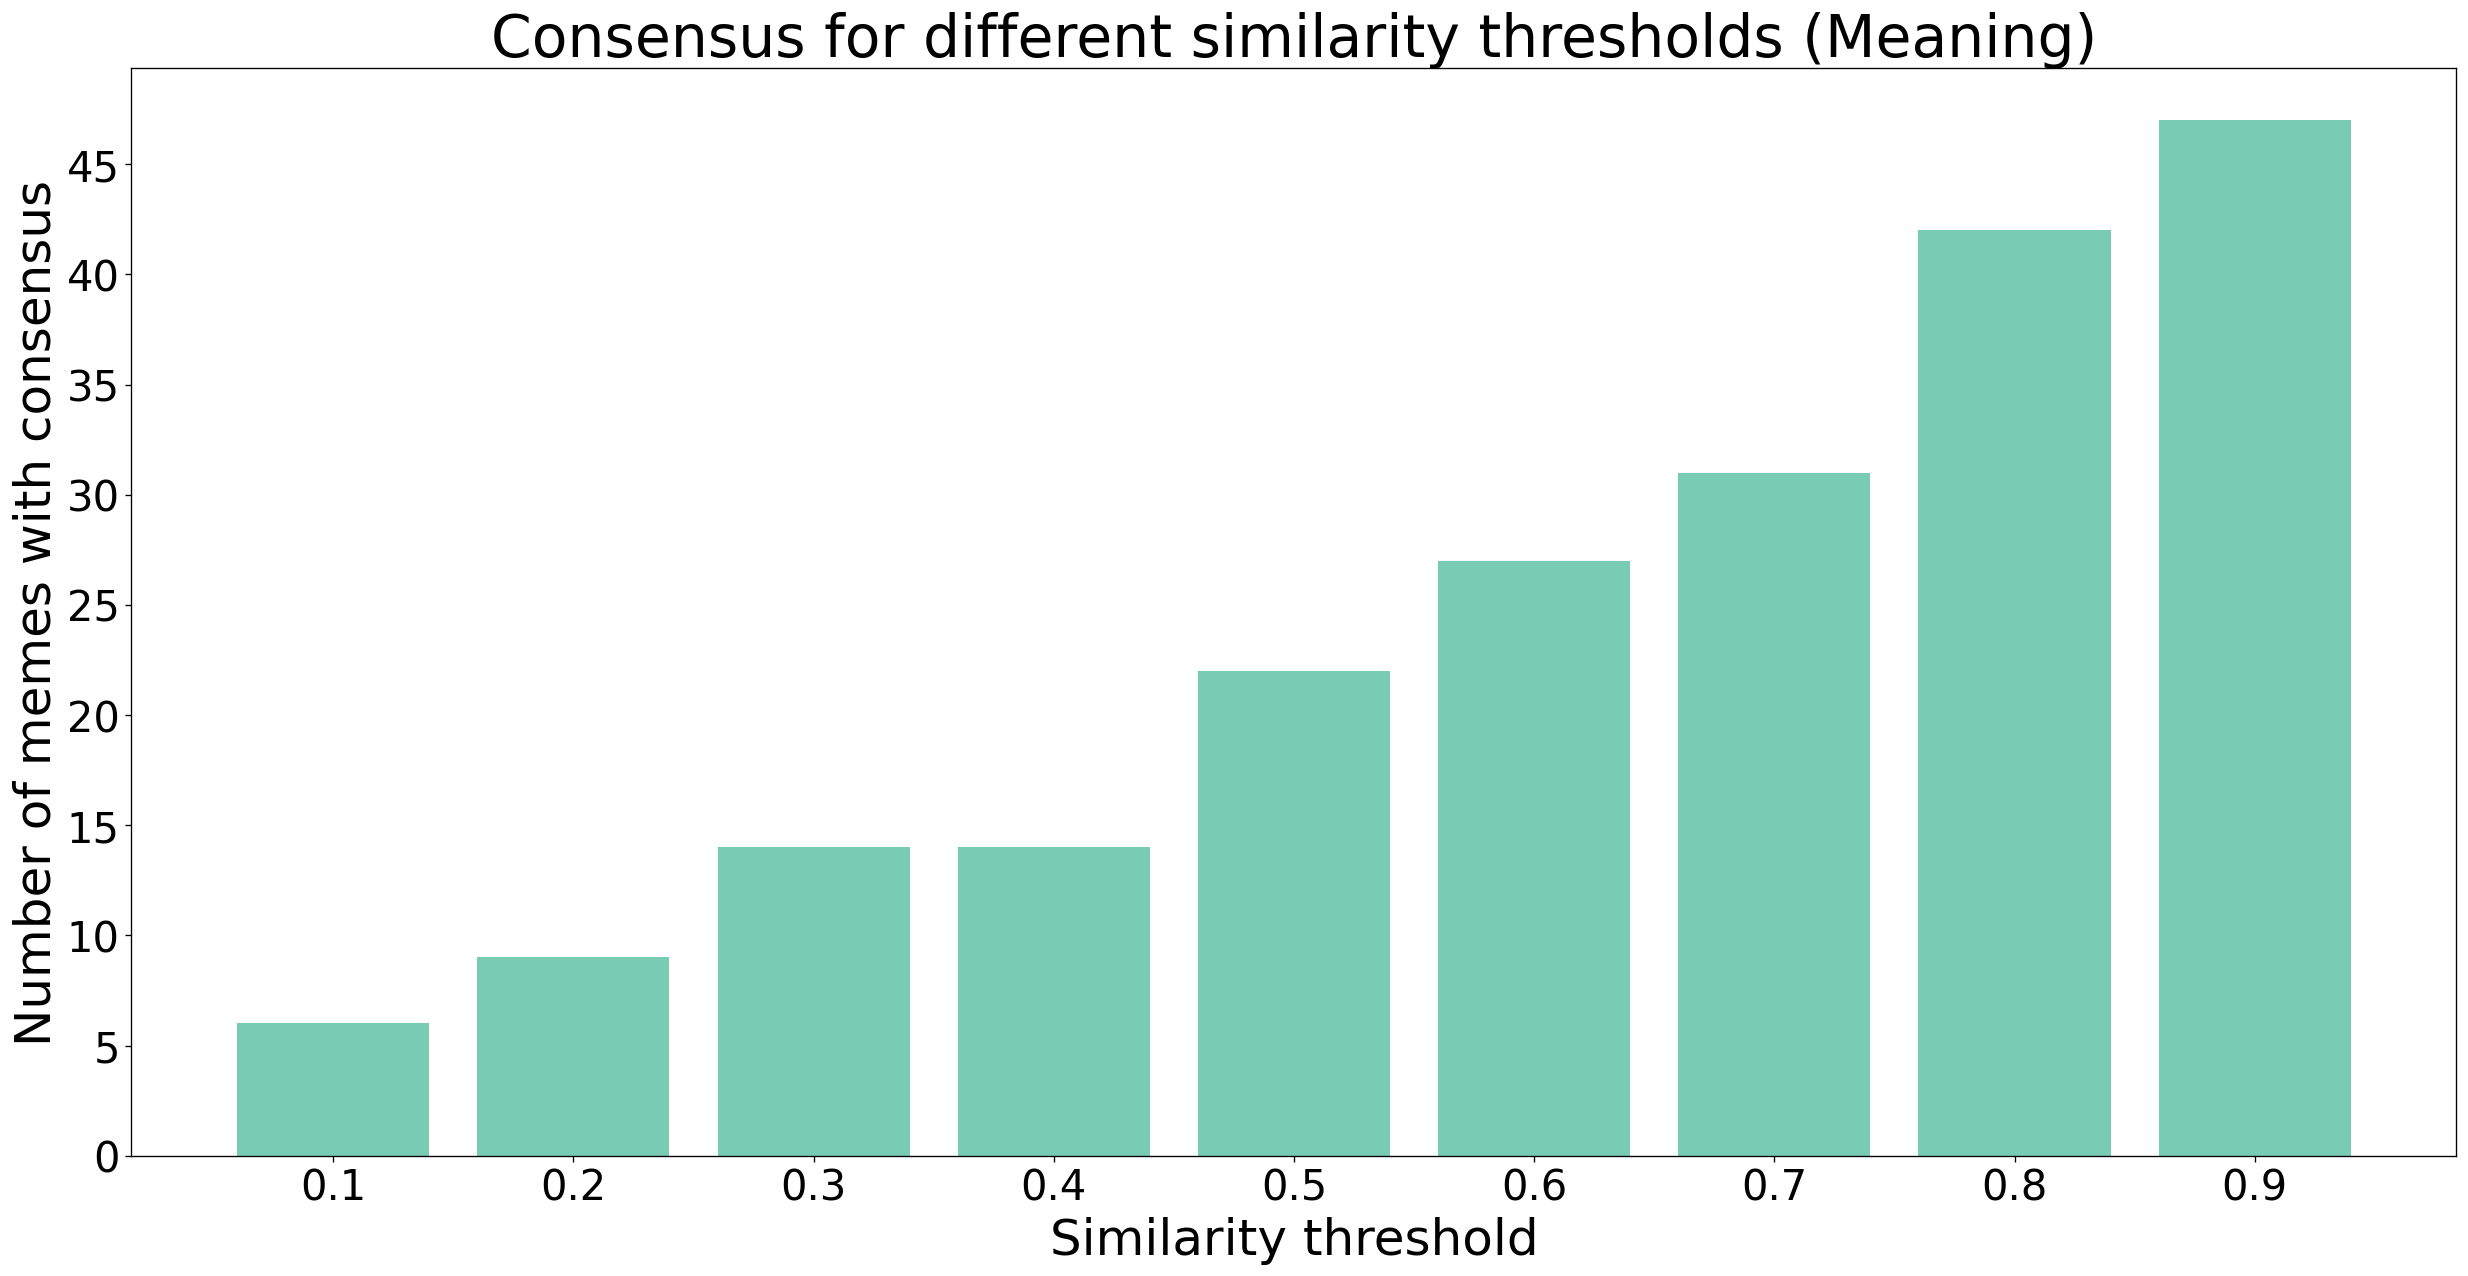

In [25]:
# Get matrices
x_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_vals = []

for sim_thresh in x_range:
    matrices = similarity_matrices(sim_thresh)

    # Calculate consensus for each meme
    consensus_data = {}
    for key, m in matrices.items():
        proportion = consensus_level(m)
        consensus_data[key] = proportion

    # Create Counter
    consensus_counter = Counter(consensus_data.values())    

    # Get number of memes that are >= consensus_percentage
    accepted_num = sum([val for key, val in consensus_counter.items() if key >= consensus_percentage])
    y_vals.append(accepted_num)
    
# Visualize
plt.figure(figsize=(25, 12), dpi=120)
plt.bar([str(n) for n in x_range], y_vals, color=hex1)
plt.ylabel('Number of memes with consensus', fontsize=medium_fontsize+5)
plt.xlabel('Similarity threshold', fontsize=medium_fontsize+5)
plt.xticks(fontsize=small_fontsize+5)
plt.yticks(np.arange(0, 50, 5), fontsize=small_fontsize+5)
plt.title("Consensus for different similarity thresholds (Meaning)".format(similarity_threshold), fontsize=large_fontsize)
# plt.savefig('graphs/toloka/meaning/similarity_thresholds.png', bbox_inches='tight')
plt.show()

#### Plot levenshtein distance histogram

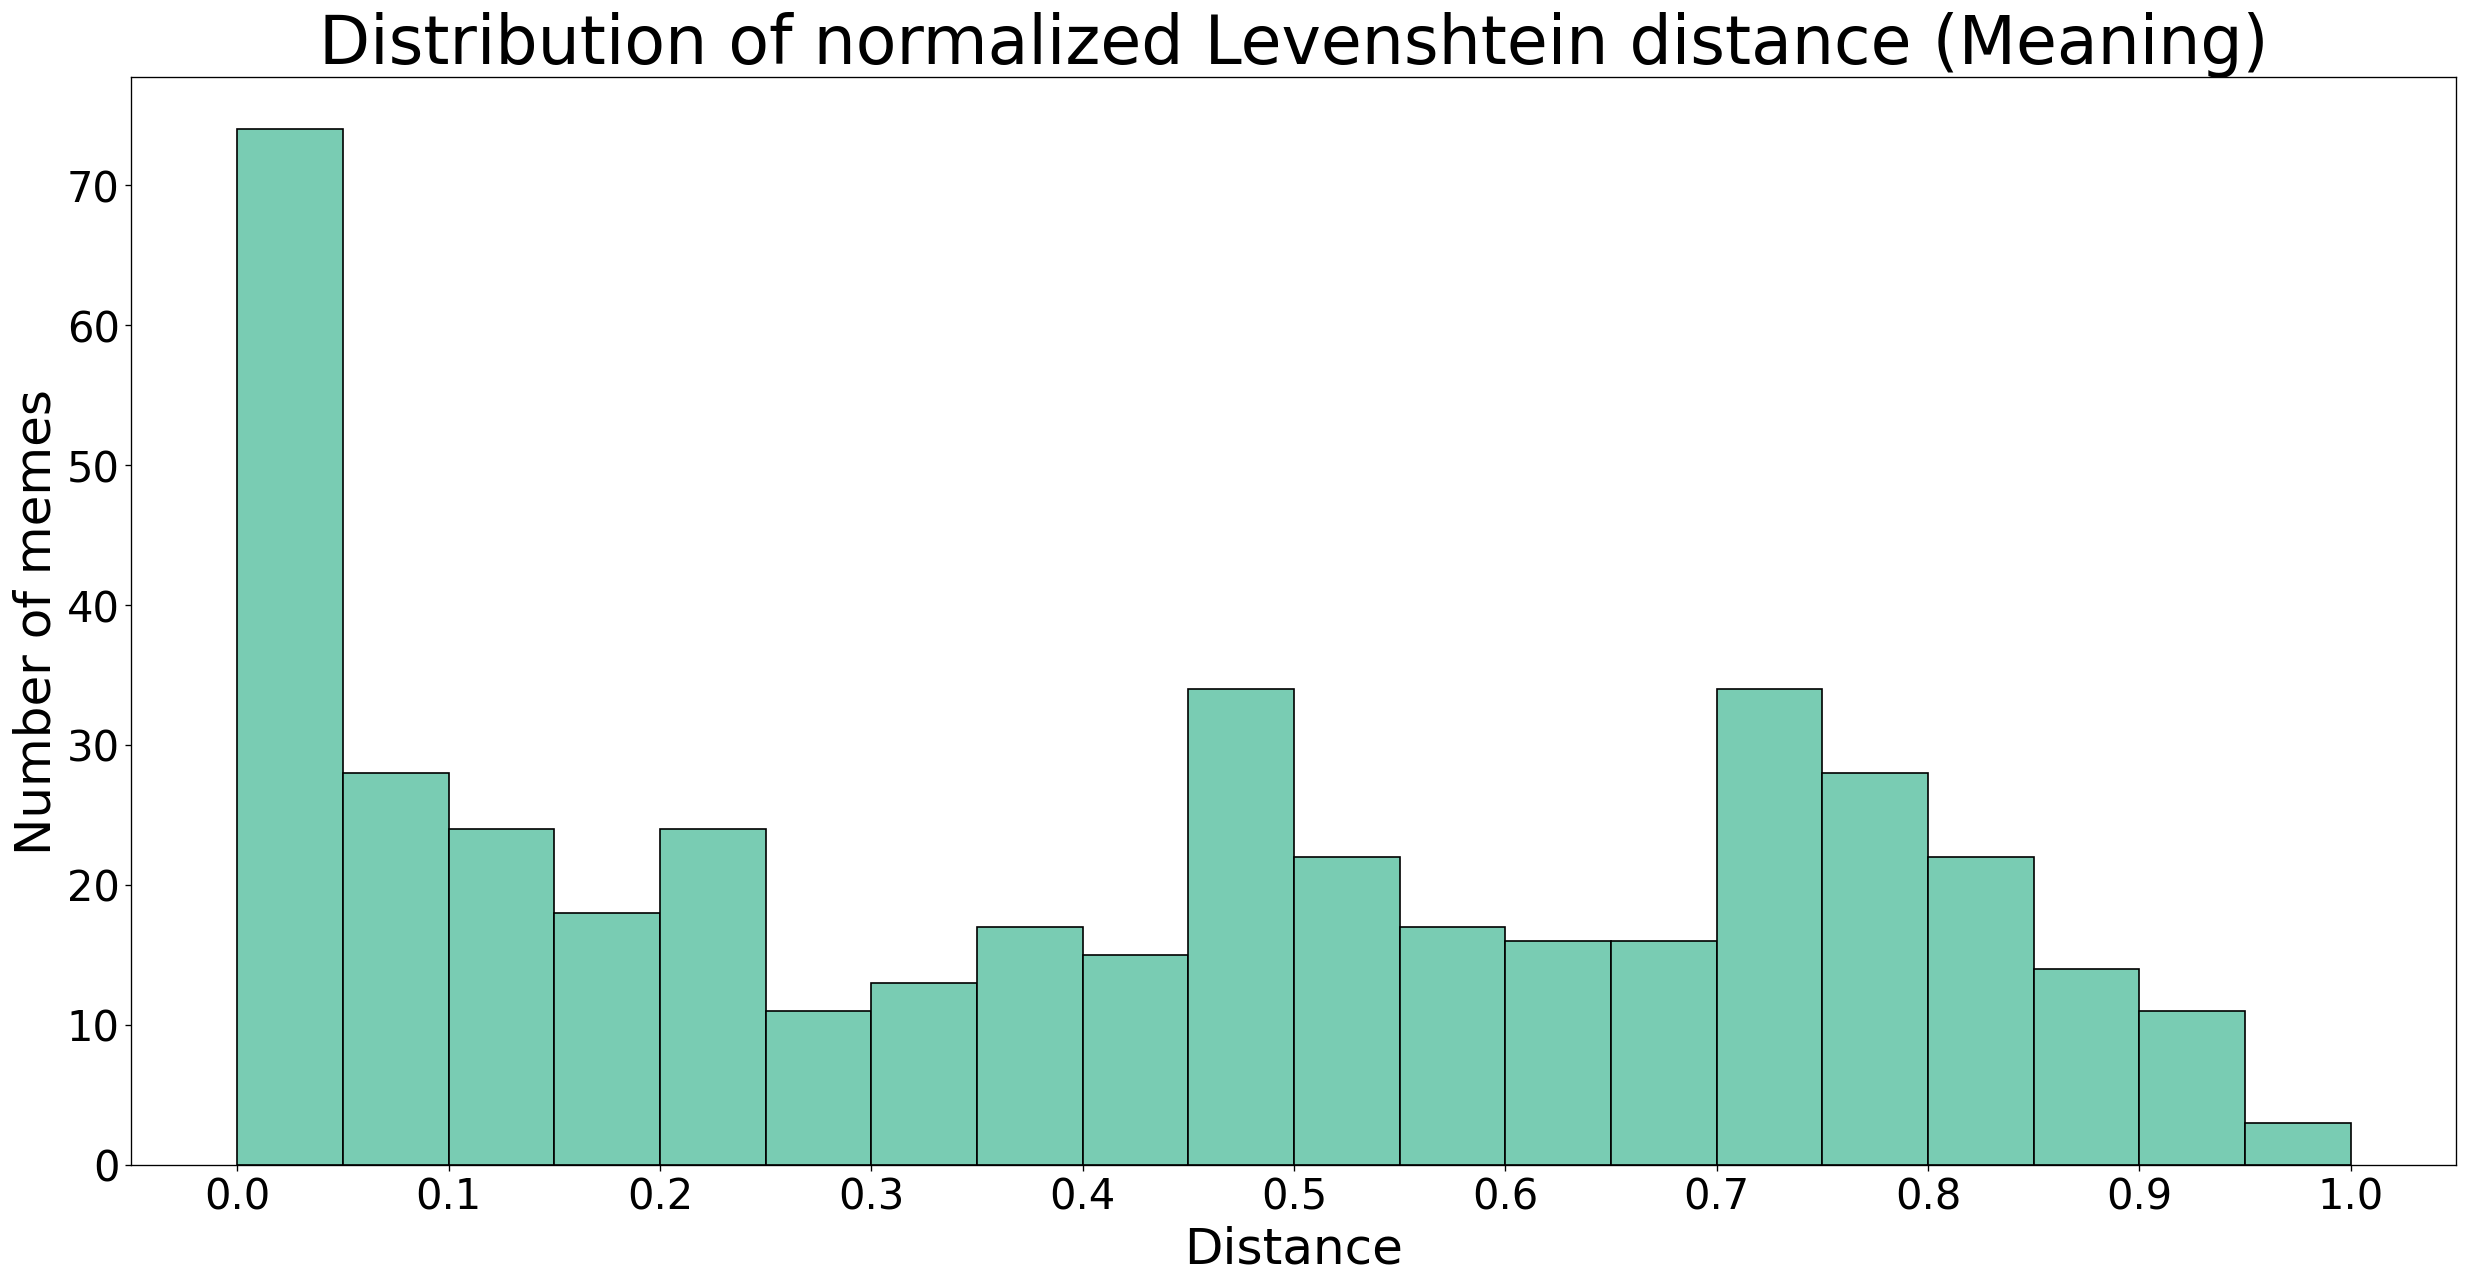

In [26]:
plt.figure(figsize=(25, 12), dpi=120)
plt.hist(hist_data, bins = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], color=hex1, edgecolor='black')
plt.title("Distribution of normalized Levenshtein distance (Meaning)", fontsize=large_fontsize+5)
plt.ylabel('Number of memes', fontsize=medium_fontsize+5)
plt.xlabel('Distance', fontsize=medium_fontsize+5)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
# plt.savefig('graphs/toloka/meaning/distance_histogram.png', bbox_inches='tight')
plt.show() 

#### Boxplots of distances for each meme

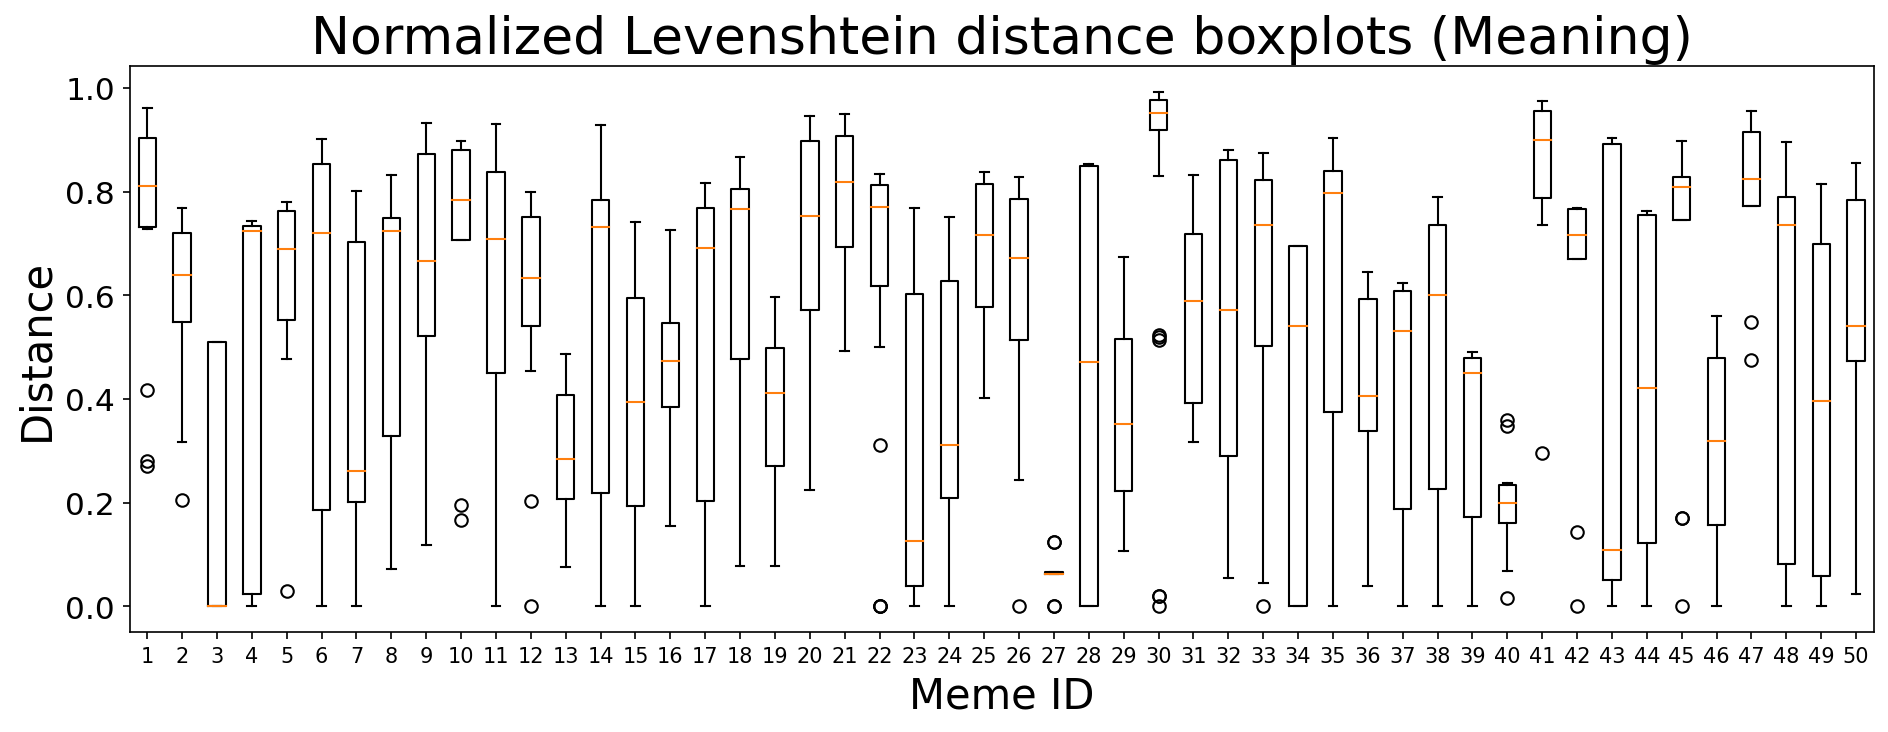

In [27]:
# Boxplot for similarity – all in one (normalized)
distances_per_meme = {key:[dist for dist_list in val.values() for dist in dist_list if dist >= 0] for key, val in distances.items()}

plt.figure(figsize=(15,5))
dist_copy = copy.deepcopy(distances_per_meme)
keys = dist_copy.keys()
data = dist_copy.values()
positions = np.arange(1, 51, step=1)
plt.boxplot(data, positions=positions, showfliers=True)
plt.title('Normalized Levenshtein distance boxplots (Meaning)', fontsize=25)
plt.ylabel('Distance', fontsize=medium_fontsize-5)
plt.xlabel('Meme ID', fontsize=medium_fontsize-5)
plt.xticks(np.arange(1, 51, step=1))
plt.yticks(fontsize=small_fontsize-5)
# plt.savefig('graphs/toloka/meaning/boxplots_norm.png', bbox_inches='tight')
plt.show() 

In [28]:
# Inspect data based on boxplot
# NB! Indices on the boxplot start from 1, not 0!
distances_list = list(distances_per_meme)
chosen = distances_list[7]
print("Highlights for {}:".format(chosen))
print(highlights[chosen])
# print(distances[chosen])

Highlights for https://knowyourmeme.com/memes/bitches-love-smiley-faces:
[(1, 'object, place or entity that may be deemed desirable'), (2, 'is an image macro series based on the snowclone template "I got that bitch (X), bitches love (X)." In the template, "X "represents any object, place or entity that may be deemed desirable. In this context, the label "bitches" is used as a mass noun to address any group of audience or viewers, regardless of gender.'), (3, 'any object, place or entity that may be deemed desirable'), (4, '"X "represents any object, place or entity that may be deemed desirable. In this context, the label "bitches" is used as a mass noun to address any group of audience or viewers, regardless of gender.'), (5, 'In the template, "X "represents any object, place or entity that may be deemed desirable. In this context, the label "bitches" is used as a mass noun to address any group of audience or viewers, regardless of gender.')]


## Evaluate agreement of Label Studio vs Toloka annotations

### Prepare data

In [36]:
# Read in and clean data
studio = pd.read_json("data/label_studio.json")
studio = studio[['annotations', 'data']]

# Add url as column
studio['url'] = [data['url'] for data in studio['data']]
studio = studio.drop(columns=['data'])

# Retrieve highlights from Label Studio JSON
ls_highlights = {}
for url, ann in zip(studio['url'], studio['annotations']):
    info = {"Title":[], "Meaning":[], "Type":[]}
    for label in ann[0]['result']:    
        text = label['value']['text']
        category = label['value']['labels'][0]
        if category in ["Meme", "Meaning", "MemeType"]:
            if category == "Meme":
                category = "Title"
            elif category == "MemeType":
                category = "Type"
            info[category].append(text)
    if url in ls_highlights.keys() and len(ls_highlights[url]['Meaning']) >= len(info['Meaning']):  # Some memes are annotated multiple times
        continue
    ls_highlights[url] = info

# Add new column with Label Studio highlights
labelstudio_col = [ls_highlights[url] for url in types['url']]
types['labelstudio'] = labelstudio_col

In [30]:
# Average length of highlights altogether
# print(np.mean([x for x in flat_annotation_lengths if x > 0]))
# flat_annotation_lengths = [x for val in annotation_words.values() for x in val]
# print(np.mean([x for x in flat_annotation_lengths if x > 0]))
meanings = [x['Meaning'] for x in labelstudio_col]
meaning_lengths = []

for mlist in meanings:
    if len(mlist) == 1:
        meaning_lengths.append(len(mlist[0].split(" ")))
    else:
        avg = []
        for m in mlist:
            avg.append(len(m.split(" ")))
        meaning_lengths.append(np.mean(avg))
        
np.mean(meaning_lengths)

9.876666666666669

In [31]:
# Only keep the 50 LS highlights
ls_highlights = {key:val for key, val in ls_highlights.items() if key in highlights.keys()}

all_highlights = copy.deepcopy(highlights)

# Join LS highlights with Toloka highlights – use ID 0
for key, val in ls_highlights.items():
    if 'Meaning' in val.keys():
        for a in val['Meaning']:
            all_highlights[key].insert(0, (0, a))
    else:
        print("MISSING ANNOTATION!")
    
# print(all_highlights[list(all_highlights.keys())[5]])

### Calculate distances

In [32]:
LS_distances = {key:{} for key in set(types['url'])}

# Calculate distances
for key, val in all_highlights.items():
    lev = {}
    for i in range(len(val) - 1):
        for j in range(i + 1, len(val)):
            ann1 = val[i]
            ann2 = val[j]
            
            # Only calculate distances between LS
            if ann1[0] != 0 and ann2[0] != 0:
                continue
                
            if ann1[0] != ann2[0]:
                new_key = "A" + str(ann1[0]) + "-A" + str(ann2[0])
                if new_key in lev.keys():
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key].append(-1)
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key].append(dist / max(len(ann1[1]), len(ann2[1])))  # normalize to [0,1] by dividing by max possible distance for this specific comparison
                else:
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key] = [-1]
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key] = [dist / max(len(ann1[1]), len(ann2[1]))]
    LS_distances[key] = lev
    
# Keep only the best distances (some annotations contain multiple highlights)
LS_best_distances = {}

for key, val in LS_distances.items():
    new_distlist = {}
    for name, dist_list in val.items():
        new_distlist[name] = min([x for x in dist_list])
    LS_best_distances[key] = new_distlist

### Inspect high distances

In [1]:
# Rate whether the distance is accurate in capturing similarity
# My subjective label: 1 – very dissimilar; 2 – somewhat similar; 3 – very similar

dist_thresh = 0.7
print("Showing all distances over {}.\n".format(dist_thresh))
for key, val in LS_best_distances.items():
    print("Title: {}. Url: {}\n".format(key.split("/")[-1], key))
    for name, distance in val.items():
        if distance > dist_thresh:
            pass
            #print("Distance between {} is {}.".format(name, round(distance, 2)))
            #print("My annotation(s):\n", [ann for ann in all_highlights[key] if ann[0] == 0])
            #print("\nTheir annotation(s):\n", [ann for ann in all_highlights[key] if ann[0] == int(name[-1])])
            #input("\nMy label: ")
            #print("-" * 100)

Showing all distances over 0.7.



NameError: name 'LS_best_distances' is not defined

In [34]:
# TODO in addition to inspecting, produce some charts for the LS and Toloka comparisons

## Compare highlight similarity: TITLE

### NUMBER of annotations

In [35]:
annotations = {key:[] for key in set(results['INPUT:memelink'])}
for url, highlights in zip(results['INPUT:memelink'], results['OUTPUT:result']):
    annotations[url].append(highlights)

# Number of annotations for Title
num_annotations = {key:[] for key in set(results['INPUT:memelink'])}
for key, val in annotations.items():
    num_annotations[key] = [len(x['Title']) if 'Title' in x.keys() else 0 for x in val]

# Rank the annotation similarity by standard deviation of NUMBER of annotations
std_annotations = {key:0 for key in set(results['INPUT:memelink'])}
for key, val in num_annotations.items():
    std_annotations[key] = np.std(val)
std_annotations = dict(sorted(std_annotations.items(), key=lambda item: item[1]))
print("Standard deviation of NUMBER of annotations (title):\n", std_annotations)

Standard deviation of NUMBER of annotations (title):
 {'https://knowyourmeme.com/memes/darth-vaders-i-find-your-lack-of-faith-disturbing': 0.0, 'https://knowyourmeme.com/memes/yall-consider-this-a-date': 0.0, 'https://knowyourmeme.com/memes/i-was-only-pretending-to-be-retarded': 0.0, 'https://knowyourmeme.com/memes/dashing-black-man-holding-dangerously-large-dorito-chip': 0.0, 'https://knowyourmeme.com/memes/4-panel-cringe': 0.0, 'https://knowyourmeme.com/memes/coincidence-i-think-not': 0.0, 'https://knowyourmeme.com/memes/talk-to-me-like-youre-a-fucking-idiot': 0.0, 'https://knowyourmeme.com/memes/is-this-a-pigeon': 0.0, 'https://knowyourmeme.com/memes/art-gallery-puking': 0.0, 'https://knowyourmeme.com/memes/pretty-cool-guy': 0.0, 'https://knowyourmeme.com/memes/running-dad': 0.0, 'https://knowyourmeme.com/memes/ideal-gf': 0.0, 'https://knowyourmeme.com/memes/modern-society-parodies': 0.0, 'https://knowyourmeme.com/memes/pennywise-the-clown': 0.0, 'https://knowyourmeme.com/memes/how-

In [36]:
# Number of annotations for Title
print("Median nr of annotations (Title) per meme:", Counter([round(np.median(nrs)) for nrs in num_annotations.values()]))
    
all_num_annotations = [x for val in num_annotations.values() for x in val]
print("Title:", Counter(all_num_annotations))

Median nr of annotations (Title) per meme: Counter({1: 40, 2: 9, 3: 1})
Title: Counter({1: 194, 2: 45, 3: 7, 0: 2, 4: 1, 6: 1})


### LENGTH of annotations

In [37]:
annotation_lengths = {key:0 for key in set(results['INPUT:memelink'])}
annotation_words = {key:0 for key in set(results['INPUT:memelink'])}
annotation_length_std = {key:0 for key in set(results['INPUT:memelink'])}
for key, val in annotations.items():
    avg_lengths = []
    avg_word_lengths = []
    for ann in val:
        avg = []
        word_avg = []
        if 'Title' in ann.keys():
            for highlight in ann['Title']:
                avg.append(len(highlight))
                word_avg.append(len(highlight.split(" ")))
            avg_lengths.append(round(sum(avg) / len(avg)))
            avg_word_lengths.append(round(sum(word_avg) / len(word_avg)))
        else:
            avg_lengths.append(0)
            avg_word_lengths.append(0)
    annotation_lengths[key] = avg_lengths
    annotation_words[key] = avg_word_lengths
    annotation_length_std[key] = np.std(avg_lengths)
    
annotation_length_std = dict(sorted(annotation_length_std.items(), key=lambda item: item[1]))
print("Standard deviation of AVERAGE LENGTH of annotations (title):\n", annotation_length_std.values())

Standard deviation of AVERAGE LENGTH of annotations (title):
 dict_values([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39999999999999997, 0.4898979485566356, 0.48989794855663565, 0.48989794855663565, 0.7999999999999999, 0.7999999999999999, 0.7999999999999999, 1.2, 1.2649110640673518, 1.5999999999999999, 1.5999999999999999, 2.0, 2.0, 2.33238075793812, 2.8, 4.0, 4.409081537009721, 4.8, 5.6000000000000005, 5.7758116312774614, 6.0, 7.2, 7.6000000000000005, 11.6, 13.227244611029162, 13.74918179383777, 17.29045979724079, 17.6, 19.636700333813724, 27.033312782565144, 83.20913411399015, 101.2])


In [38]:
annotations[list(annotation_length_std.keys())[-6]]

[{'Title': ['"That’s Where You’re Wrong, Kiddo," also known as "You’re Wrong Kiddo,"'],
  'Meaning': ['Online, it is typically used as a reaction image to preface one\'s rebuttal to a statement put forth by another poster, in a similar vein to the use of "Let Me Tell You Why That\'s Bullshit" image macros.']},
 {'Title': ['"That’s Where You’re Wrong, Kiddo'],
  'Meaning': ["reaction image to preface one's rebuttal to a statement put forth by another poster"]},
 {'Title': ['"That’s Where You’re Wrong, Kiddo', '"You’re Wrong Kiddo'],
  'Meaning': ["it is typically used as a reaction image to preface one's rebuttal to a statement put forth by another poster"]},
 {'Title': ['"That’s Where You’re Wrong, Kiddo,"', '"You’re Wrong Kiddo,"'],
  'Meaning': ["used as a reaction image to preface one's rebuttal to a statement put forth by another poster"]},
 {'Title': ['"That’s Where You’re Wrong, Kiddo', '"You’re Wrong Kiddo'],
  'Meaning': ["preface one's rebuttal to a statement put forth by anot

0.728


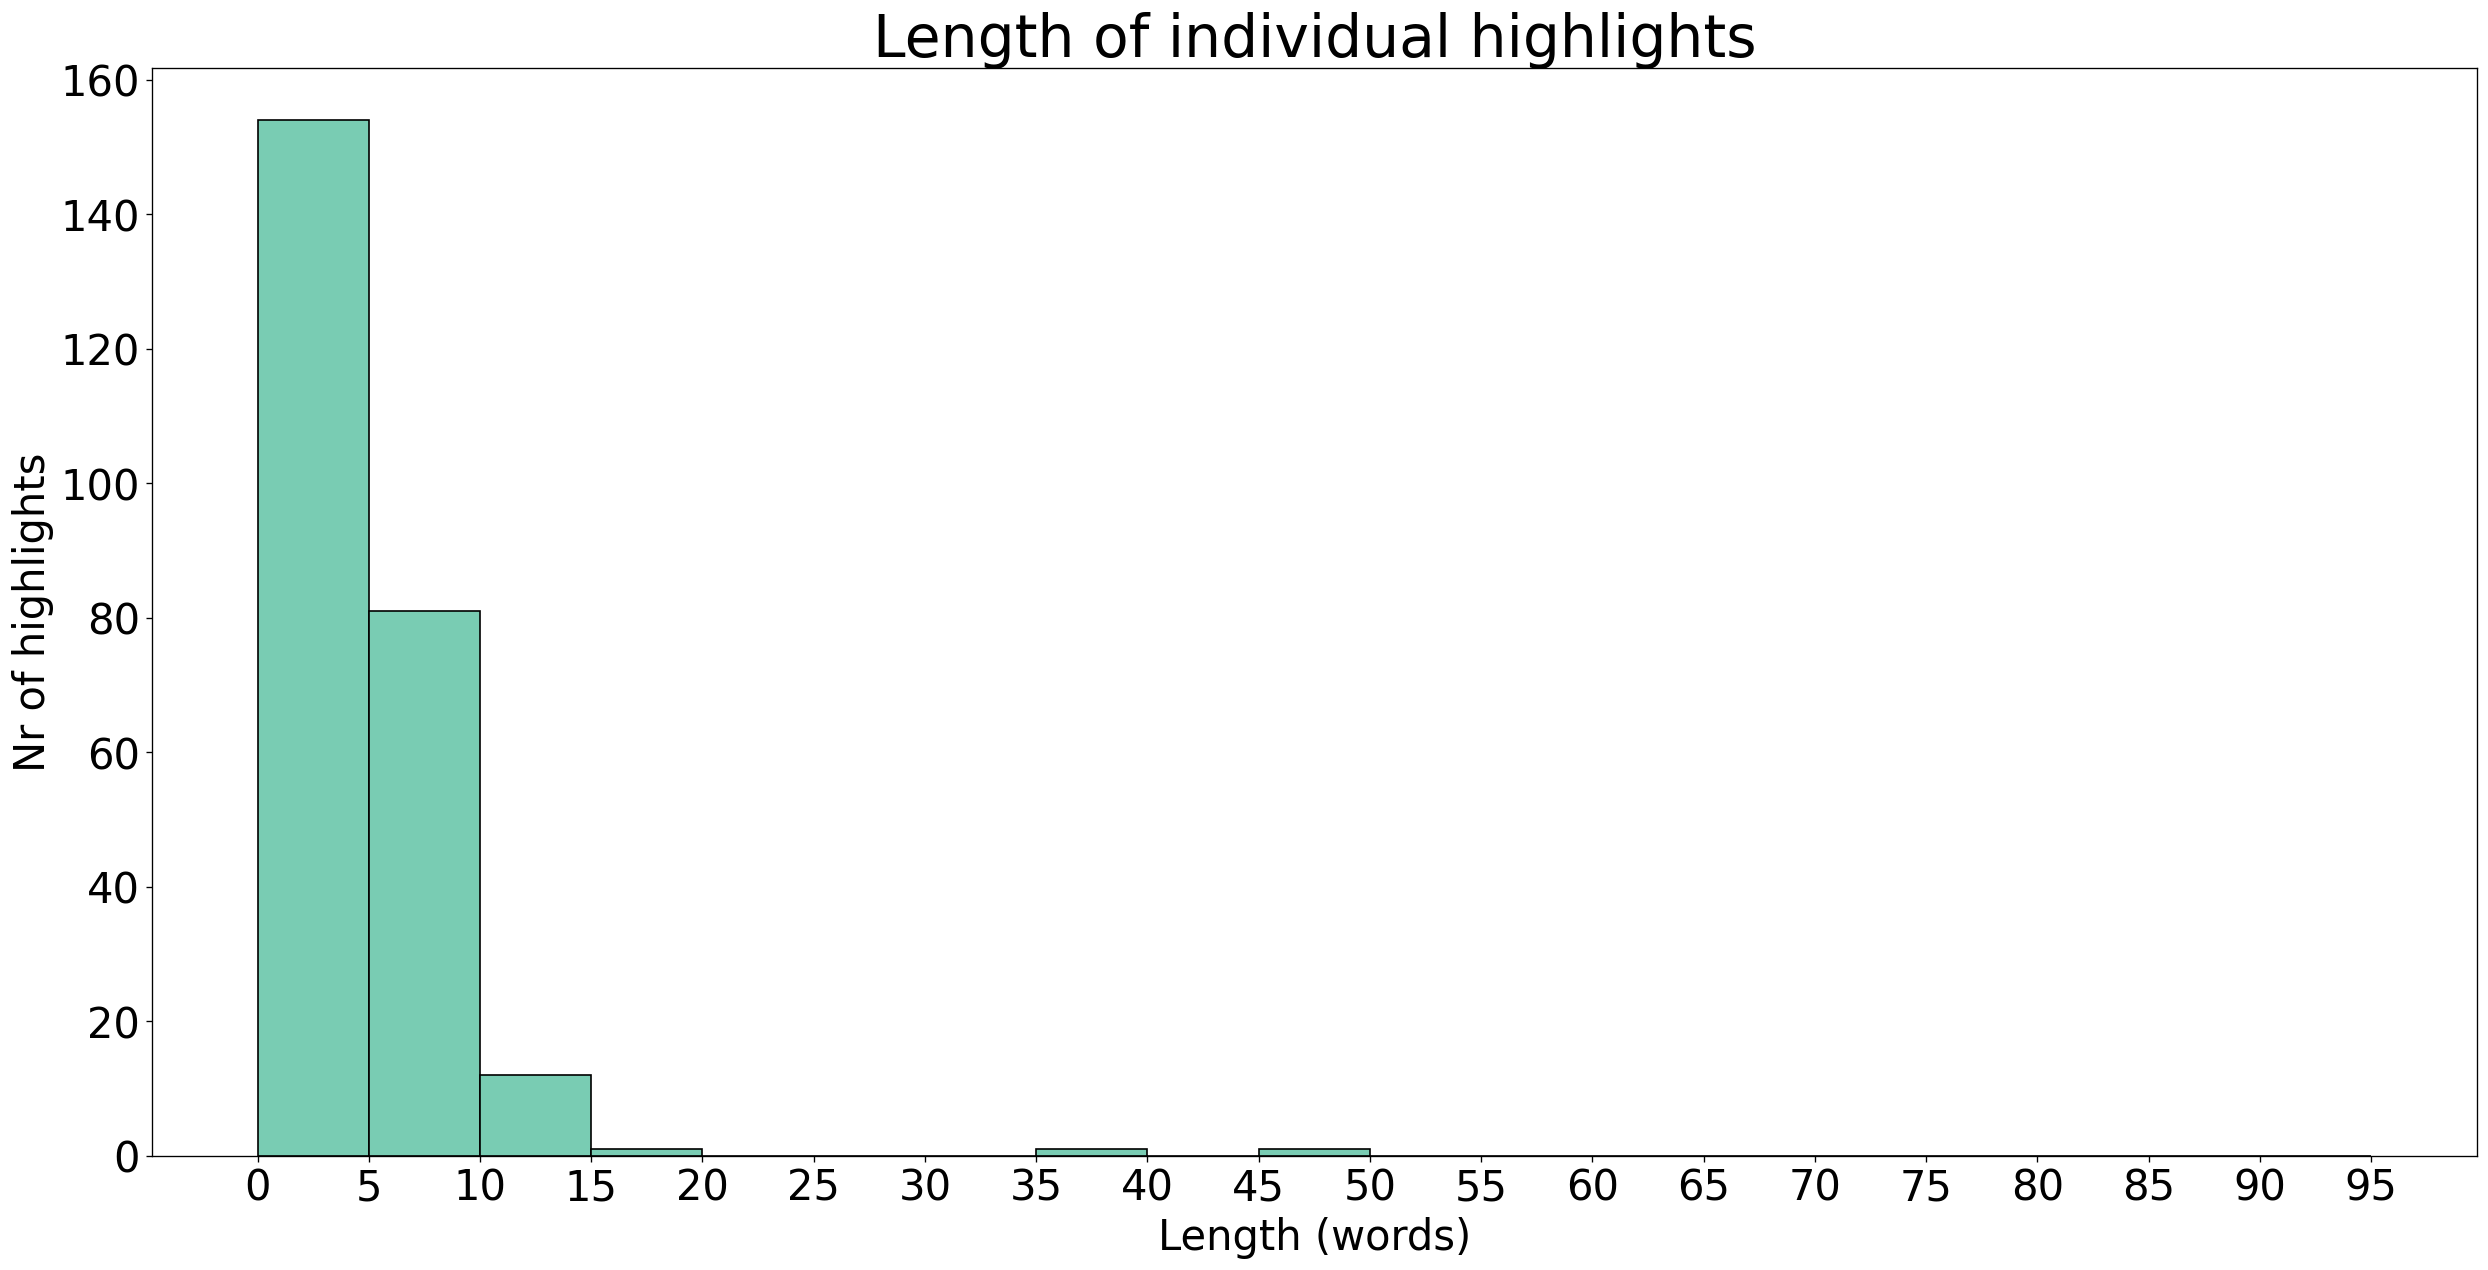

In [39]:
# Length of individual highlights (words)
flat_annotation_words = [x for val in annotation_words.values() for x in val]
top = list(map(lambda x: x < 6, flat_annotation_words))
print(sum(top) / len(top))

plt.figure(figsize=(25, 12), dpi=120)
plt.hist(flat_annotation_words, bins=np.arange(0, 100, 5), color=hex1, edgecolor='black')
plt.title("Length of individual highlights", fontsize=large_fontsize)
plt.ylabel('Nr of highlights', fontsize=medium_fontsize)
plt.xlabel('Length (words)', fontsize=medium_fontsize)
plt.xticks(np.arange(0, 100, 5), fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
# plt.savefig('graphs/toloka/meaning/nr_annotations_hist.png', bbox_inches='tight')
plt.show()

### DISTANCE of annotations (Levenshtein)

#### Make dictionary of all highlights

In [40]:
highlights = {key:[] for key in set(results['INPUT:memelink'])}

for key, val in annotations.items():
    ID = 0
    anns = []
    for ann in val:
        ID += 1
        if 'Title' in ann.keys():
            for a in ann['Title']:
                anns.append((ID, a))
        else:
            anns.append((ID, "")) # Missing annotations
    highlights[key] = anns

#### Make dictionary of all distances

In [41]:
distances = {key:{} for key in set(results['INPUT:memelink'])}

# Calculate distances
for key, val in highlights.items():
    lev = {}
    for i in range(len(val) - 1):
        for j in range(i + 1, len(val)):
            ann1 = val[i]
            ann2 = val[j]
            if ann1[0] != ann2[0]:
                new_key = "A" + str(ann1[0]) + "-A" + str(ann2[0])
                if new_key in lev.keys():
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key].append(-1)
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key].append(dist / max(len(ann1[1]), len(ann2[1])))  # normalize to [0,1], see https://stackoverflow.com/questions/45783385/normalizing-the-edit-distance
                else:
                    if ann1[1] == "" or ann2[1] == "":
                        lev[new_key] = [-1]
                    else:
                        dist = Levenshtein.distance(ann1[1].strip(" ,.:;-"), ann2[1].strip(" ,.:;-"))
                        lev[new_key] = [dist / max(len(ann1[1]), len(ann2[1]))]
    distances[key] = lev
    
# Create flat list with all distances
hist_data = [min(x) for val in distances.values() for x in val.values()]
hist_data = [x for x in hist_data if x != -1]

#### Plot number of memes that match consensus

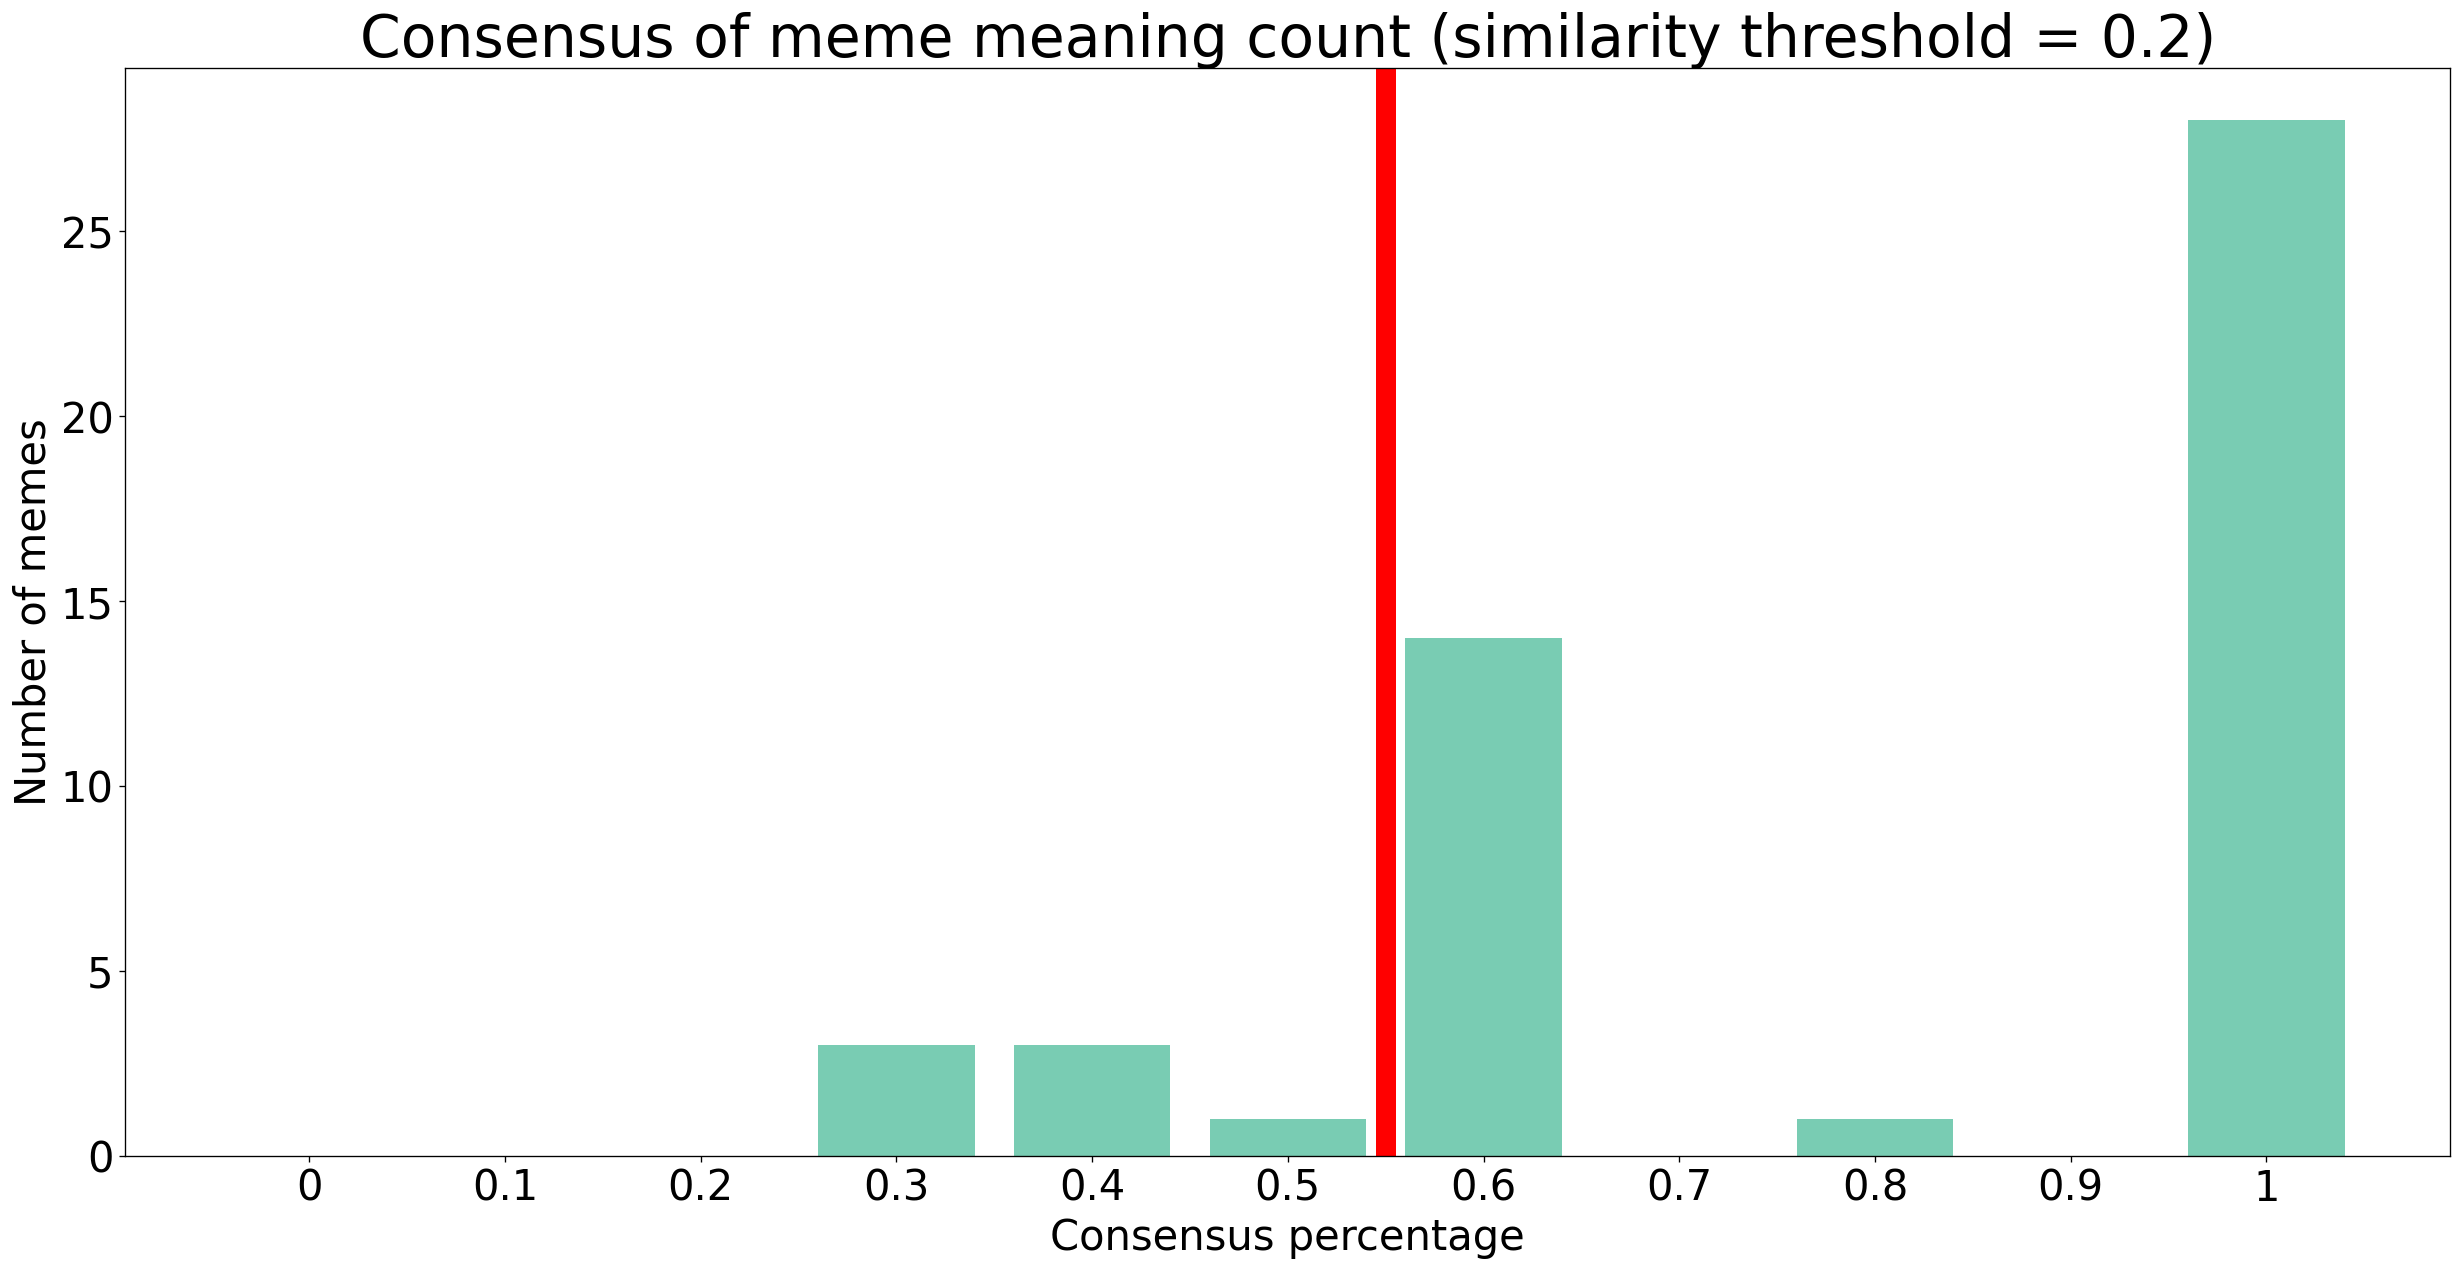

In [42]:
# Calculate consensus for each meme
matrices = similarity_matrices(similarity_threshold)

consensus_data = {}
for key, m in matrices.items():
    proportion = consensus_level(m)
    consensus_data[key] = proportion
    
# Create Counter
consensus_counter = Counter(consensus_data.values())    
    
# Fill in missing values with 0
for i in np.arange(0, 1.1, 0.1):
    i = round(i,1)
    if i not in consensus_counter.keys():
        consensus_counter[i] = 0

# Sort the data
consensus_counter = dict(sorted(consensus_counter.items(), key=lambda item: item[0], reverse=False))

# Visualize
plt.figure(figsize=(25, 12), dpi=120)
plt.bar(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'], consensus_counter.values(), color=hex1)
plt.axvline(x=consensus_percentage*10*0.917, color="red", linewidth=12)
plt.ylabel('Number of memes', fontsize=medium_fontsize)
plt.xlabel('Consensus percentage', fontsize=medium_fontsize)
plt.xticks(fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
plt.title("Consensus of meme meaning count (similarity threshold = {})".format(similarity_threshold), fontsize=large_fontsize)
# plt.savefig('graphs/toloka/title/consensus.png', bbox_inches='tight')
plt.show() 

#### Plot number of accepted memes for different similarity thresholds

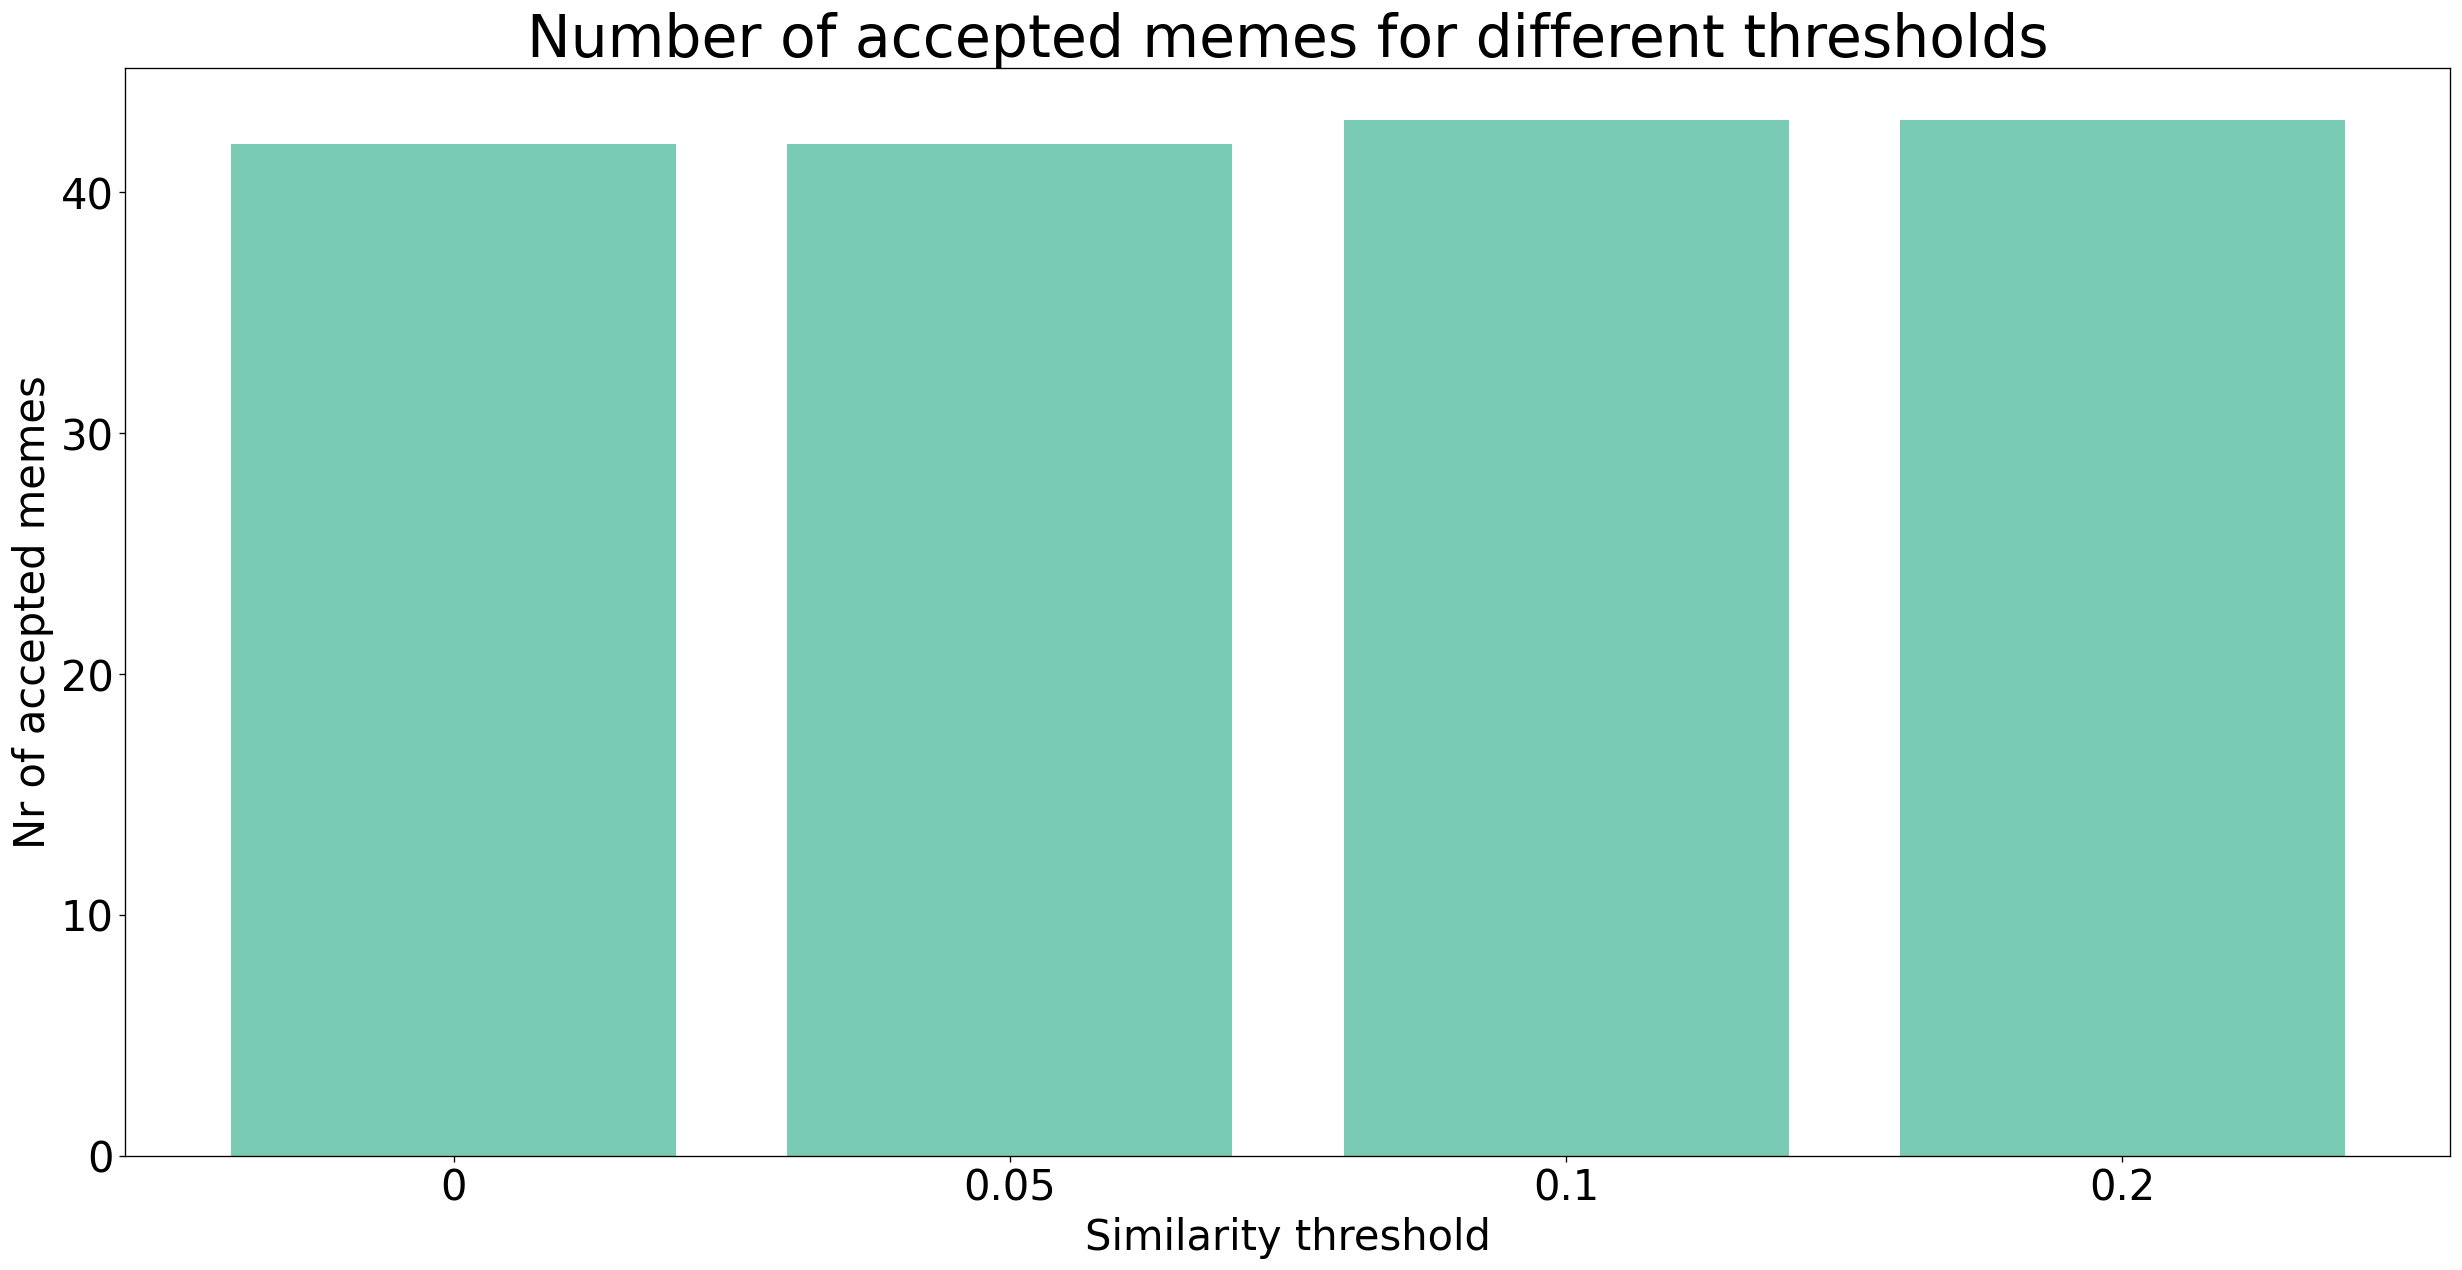

In [46]:
# Get matrices
x_range = [0, 0.05, 0.1, 0.2]
y_vals = []

for sim_thresh in x_range:
    matrices = similarity_matrices(sim_thresh)

    # Calculate consensus for each meme
    consensus_data = {}
    for key, m in matrices.items():
        proportion = consensus_level(m)
        consensus_data[key] = proportion

    # Create Counter
    consensus_counter = Counter(consensus_data.values())    

    # Get number of memes that are >= consensus_percentage
    accepted_num = sum([val for key, val in consensus_counter.items() if key >= consensus_percentage])
    y_vals.append(accepted_num)
    

# Visualize
plt.figure(figsize=(25, 12), dpi=120)
plt.bar([str(n) for n in x_range], y_vals, color=hex1)
plt.ylabel('Nr of accepted memes', fontsize=medium_fontsize)
plt.xlabel('Similarity threshold', fontsize=medium_fontsize)
plt.xticks(fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
plt.title("Number of accepted memes for different thresholds".format(similarity_threshold), fontsize=large_fontsize)
# plt.savefig('graphs/toloka/title/similarity_thresholds.png', bbox_inches='tight')
plt.show()

#### Plot levenshtein distance histogram

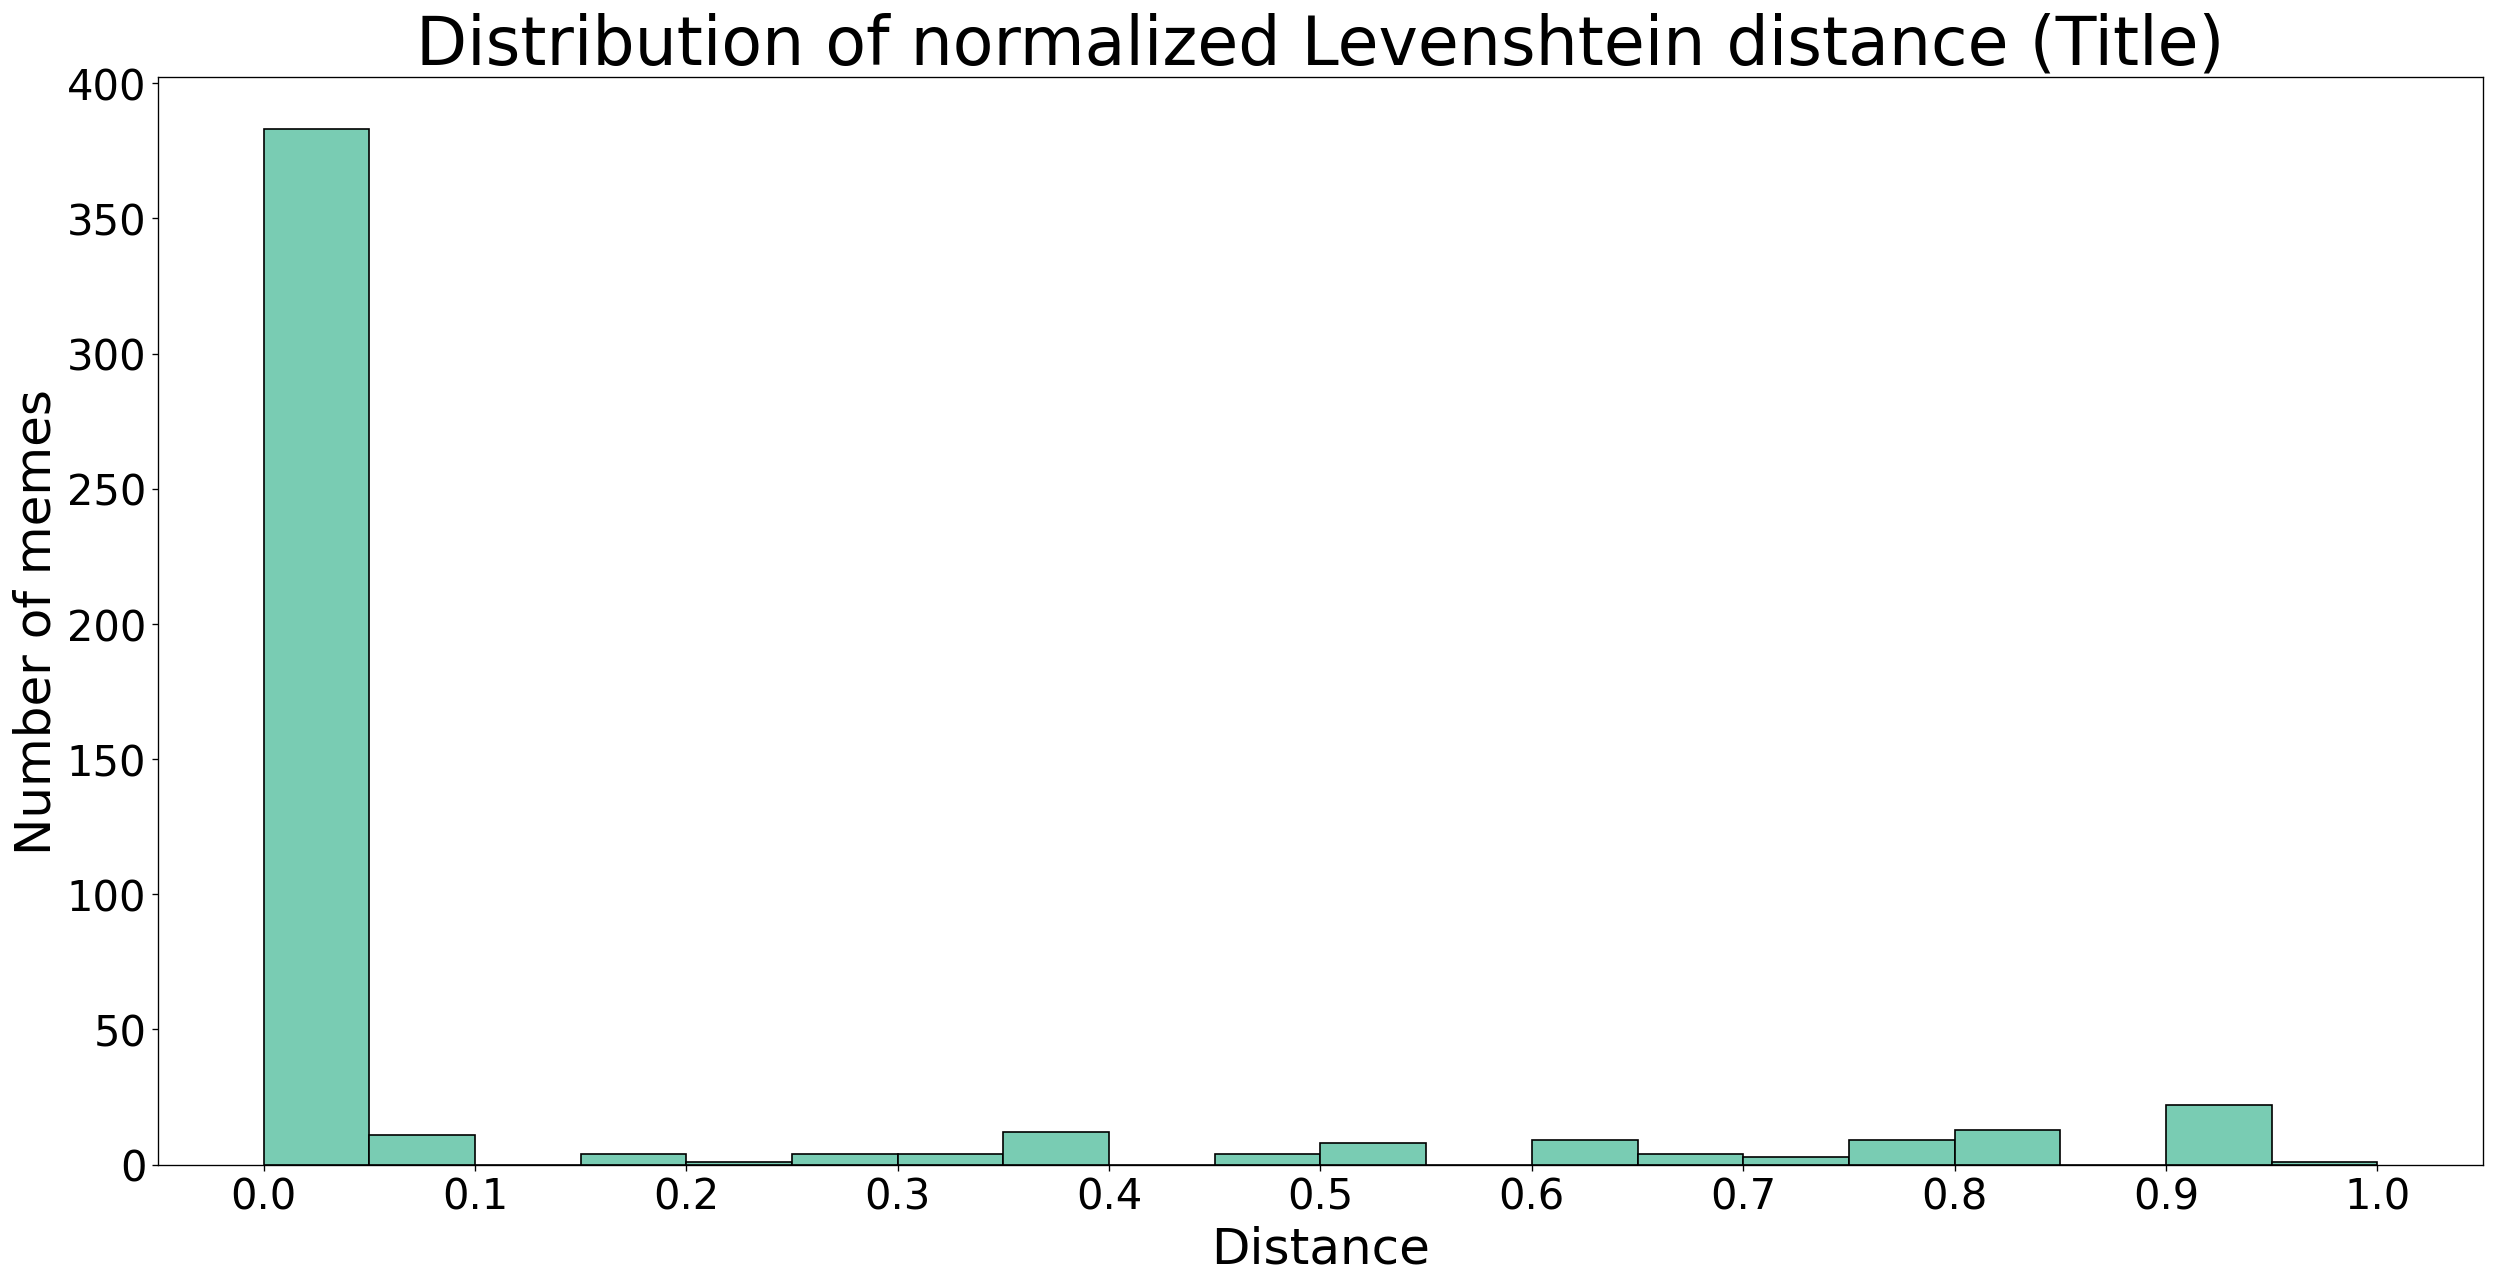

In [44]:
plt.figure(figsize=(25, 12), dpi=120)
plt.hist(hist_data, bins = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], color=hex1, edgecolor='black')
plt.title("Distribution of normalized Levenshtein distance (Title)", fontsize=large_fontsize+5)
plt.ylabel('Number of memes', fontsize=medium_fontsize+5)
plt.xlabel('Distance', fontsize=medium_fontsize+5)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], fontsize=small_fontsize+5)
plt.yticks(fontsize=small_fontsize+5)
# plt.savefig('graphs/toloka/title/distance_histogram.png', bbox_inches='tight')
plt.show() 

#### Boxplots of distances for each meme

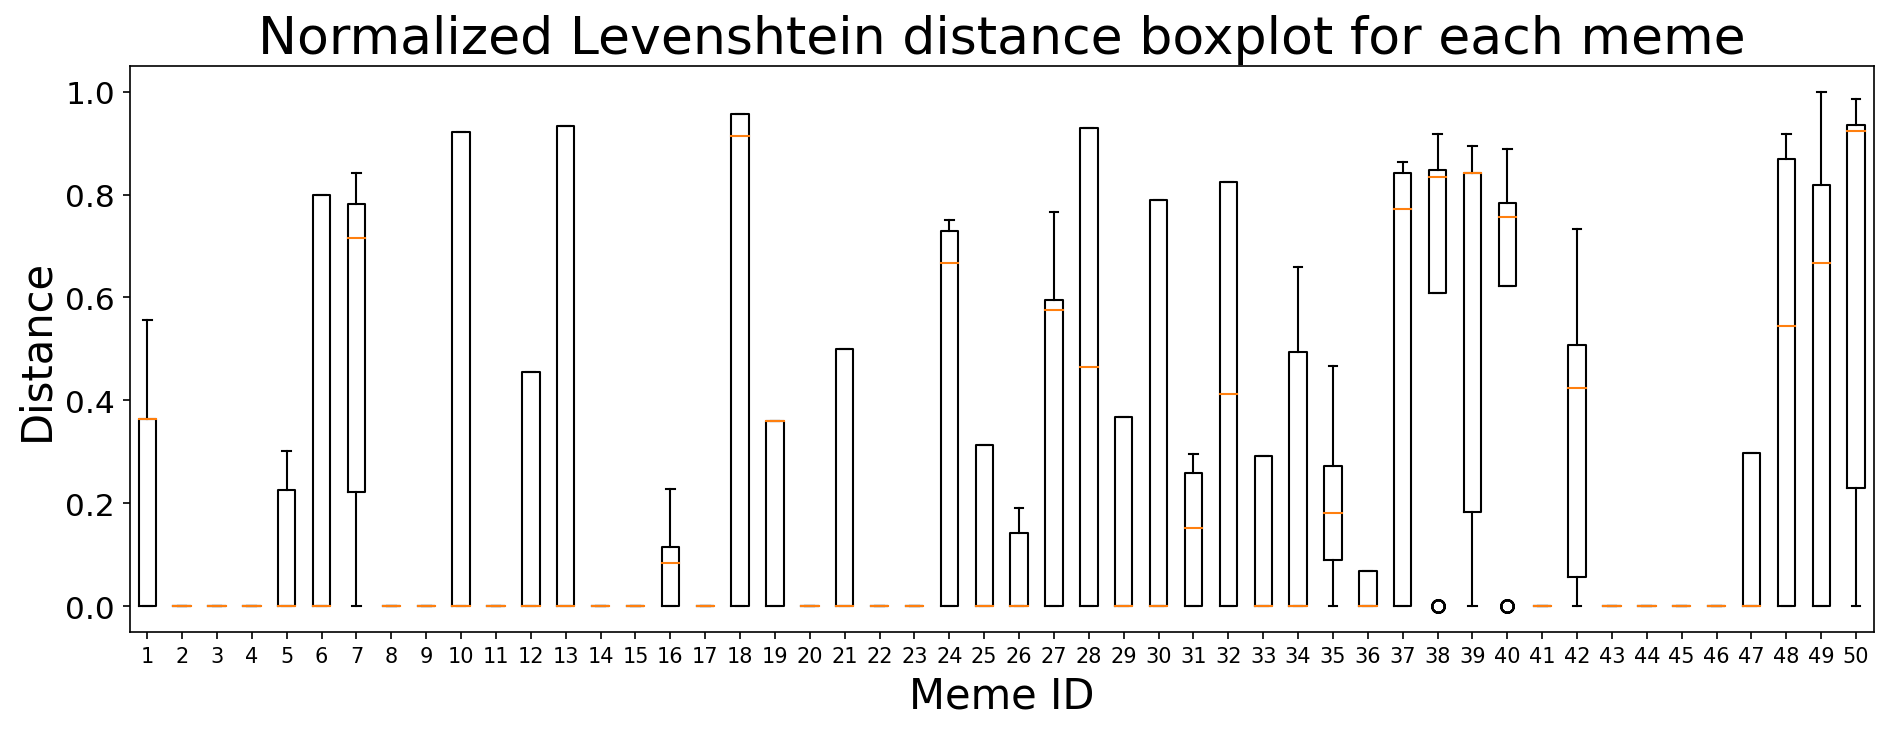

In [45]:
# Boxplot for similarity – all in one (normalized)
distances_per_meme = {key:[dist for dist_list in val.values() for dist in dist_list if dist >= 0] for key, val in distances.items()}

plt.figure(figsize=(15,5))
dist_copy = copy.deepcopy(distances_per_meme)
keys = dist_copy.keys()
data = dist_copy.values()
positions = np.arange(1, 51, step=1)
plt.boxplot(data, positions=positions, showfliers=True)
plt.title('Normalized Levenshtein distance boxplot for each meme', fontsize=25)
plt.ylabel('Distance', fontsize=medium_fontsize-5)
plt.xlabel('Meme ID', fontsize=medium_fontsize-5)
plt.xticks(np.arange(1, 51, step=1))
plt.yticks(fontsize=small_fontsize-5)

# plt.savefig('graphs/toloka/title/boxplots_norm.png', bbox_inches='tight')
plt.show() 